<div>
<img src="https://www.nasa.gov/wp-content/uploads/2024/07/osdr-gl4hs-logo.png" width="600"/>
</div>

# **NOTEBOOK 2: Preparing RNA-seq reads**

In this notebook, you will be preparing the RNA-seq reads you just downloaded in the previous notebook for subsequent processing. You will first calculate and compare the quality of each of the 2 FASTQ files. Next you will trim short, low-quality, and extraneous reads from each of the 2 FASTQ files. Last, you will calculate the quality again for one of the paired-end FASTQ files and compare it to what it was before trimming.

## **Objectives of this notebook**
The primary objective of this notebook is to ensure that the quality of the RNA-seq reads for our sample is sufficient.  To measure the quality of the FASTQ data, you will use the FastQC tool developed by Simon Andrews. You can learn more about FastQC in this [tutorial](https://rtsf.natsci.msu.edu/genomics/technical-documents/fastqc-tutorial-and-faq.aspx).

You will install and use a tool called `trim_galore` to trim short reads, low-quality reads, and adapter reads from your FASTQ files. The `trim_galore` command is itself a wrapper of both the FastQC tool and the `cutadapt` tool. You can learn more about `trim_galore` in this [user guide](https://github.com/FelixKrueger/TrimGalore/blob/master/Docs/Trim_Galore_User_Guide.md).

Note that there are a few ways you can display the images generated in this notebook. One way is to look at them inside the notebook. If they are too small to read, you can click on an image to enlarge it. Another way is to navigate inside your Google Drive folder, download the HTML/PDF/image files to your laptop, and look at them from your laptop.

## **UNIX commands introduced in this notebook**

[`apt-get`](https://manpages.ubuntu.com/manpages/lunar/man8/apt-get.8.html) command to install operating system packages from the Internet.

[`pip`](https://pip.pypa.io/en/stable/cli/pip_install/) command to install Python packages from the Internet.

[`tar`](https://man7.org/linux/man-pages/man1/tar.1.html) command to extract an archive of files.

[`wget`](https://linux.die.net/man/1/wget) command to download files from the Internet.

[`chmod`](https://man7.org/linux/man-pages/man1/chmod.1p.html) command to change permissions of a file.

[`wkhtmltopdf`](https://wkhtmltopdf.org/usage/wkhtmltopdf.txt) to convert HTML to PDF.



# Prepare notebook environment

In [6]:
# mount google drive
from google.colab import drive
drive.flush_and_unmount()
drive.mount("mnt")


Mounted at mnt


In [7]:
# time the notebook
import datetime
start_time = datetime.datetime.now()
print('notebook start time: ', start_time.strftime('%Y-%m-%d %H:%M:%S'))

notebook start time:  2025-07-14 18:38:24


In [8]:
# make sure FASTQ_DIR directory exists on google drive
import os
FASTQ_DIR="/content/mnt/MyDrive/NASA/GL4HS/FASTQ"
if not os.path.exists(FASTQ_DIR):
  raise Exception('STOP! Make sure you run the previous notebook before running this one')


In [9]:
# make sure reduced_r1.fastq.gz and reduced_r2.fastq.gz files are in place
if not os.path.exists(f"{FASTQ_DIR}/reduced_r1.fastq.gz") or not os.path.exists(f"{FASTQ_DIR}/reduced_r2.fastq.gz"):
  raise Exception('STOP! Make sure you run the previous notebook before running this one')

In [10]:
# create the TRIM directory for this notebook
if not os.path.exists(f"{FASTQ_DIR}/TRIM"):
  !mkdir {FASTQ_DIR}/TRIM

# Run FastQC to check the quality of the FASTQ files before trimming

In [11]:
# install FastQC
if os.path.exists(f"{FASTQ_DIR}/FastQC"):
  print('FastQC already installed - removing now to reinstall')
  !rm -rf {FASTQ_DIR}/FastQC
!mkdir {FASTQ_DIR}/FastQC
!wget -O {FASTQ_DIR}/fastqc.zip https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.12.1.zip
!unzip {FASTQ_DIR}/fastqc.zip -d {FASTQ_DIR} > /dev/null
!chmod +x {FASTQ_DIR}/FastQC/fastqc

--2025-07-14 18:38:24--  https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.12.1.zip
Resolving www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)... 149.155.133.4
Connecting to www.bioinformatics.babraham.ac.uk (www.bioinformatics.babraham.ac.uk)|149.155.133.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11709692 (11M) [application/zip]
Saving to: ‘/content/mnt/MyDrive/NASA/GL4HS/FASTQ/fastqc.zip’

/content/mnt/MyDriv 100%[===================>]  11.17M  7.62MB/s    in 1.5s    

2025-07-14 18:38:26 (7.62 MB/s) - ‘/content/mnt/MyDrive/NASA/GL4HS/FASTQ/fastqc.zip’ saved [11709692/11709692]



In [12]:
# check the version of fastqc
!{FASTQ_DIR}/FastQC/fastqc --version

FastQC v0.12.1


In [13]:
# remove the fastqc.zip file as we don't need it anymore
!rm -f {FASTQ_DIR}/fastqc.zip

In [14]:
# make directories for FASTQC output
if os.path.exists(f"{FASTQ_DIR}/FASTQC_R1_OUT"):
  !rm -rf {FASTQ_DIR}/FASTQC_R1_OUT
!mkdir {FASTQ_DIR}/FASTQC_R1_OUT
if os.path.exists(f"{FASTQ_DIR}/FASTQC_R2_OUT"):
  !rm -rf {FASTQ_DIR}/FASTQC_R2_OUT
!mkdir {FASTQ_DIR}/FASTQC_R2_OUT

In [15]:
# run fastqc on compressed reduced R1 fastq file
!{FASTQ_DIR}/FastQC/fastqc  {FASTQ_DIR}/reduced_r1.fastq.gz -t 2 -o {FASTQ_DIR}/FASTQC_R1_OUT
# check for error message

application/gzip
Started analysis of reduced_r1.fastq.gz
Approx 5% complete for reduced_r1.fastq.gz
Approx 10% complete for reduced_r1.fastq.gz
Approx 15% complete for reduced_r1.fastq.gz
Approx 20% complete for reduced_r1.fastq.gz
Approx 25% complete for reduced_r1.fastq.gz
Approx 30% complete for reduced_r1.fastq.gz
Approx 35% complete for reduced_r1.fastq.gz
Approx 40% complete for reduced_r1.fastq.gz
Approx 45% complete for reduced_r1.fastq.gz
Approx 50% complete for reduced_r1.fastq.gz
Approx 55% complete for reduced_r1.fastq.gz
Approx 60% complete for reduced_r1.fastq.gz
Approx 65% complete for reduced_r1.fastq.gz
Approx 70% complete for reduced_r1.fastq.gz
Approx 75% complete for reduced_r1.fastq.gz
Approx 80% complete for reduced_r1.fastq.gz
Approx 85% complete for reduced_r1.fastq.gz
Approx 90% complete for reduced_r1.fastq.gz
Approx 95% complete for reduced_r1.fastq.gz
Analysis complete for reduced_r1.fastq.gz


In [16]:
# list fastqc output directory
# you should see the reduced R1 fastqc.html and fastqc.zip files that got generated in the previous step
!ls -lh {FASTQ_DIR}/FASTQC_R1_OUT

total 1.1M
-rw------- 1 root root 642K Jul 14 18:38 reduced_r1_fastqc.html
-rw------- 1 root root 458K Jul 14 18:38 reduced_r1_fastqc.zip


In [17]:
# run fastqc on compressed reduced R2 fastq file
!{FASTQ_DIR}/FastQC/fastqc  {FASTQ_DIR}/reduced_r2.fastq.gz -t 2 -o {FASTQ_DIR}/FASTQC_R2_OUT

application/gzip
Started analysis of reduced_r2.fastq.gz
Approx 5% complete for reduced_r2.fastq.gz
Approx 10% complete for reduced_r2.fastq.gz
Approx 15% complete for reduced_r2.fastq.gz
Approx 20% complete for reduced_r2.fastq.gz
Approx 25% complete for reduced_r2.fastq.gz
Approx 30% complete for reduced_r2.fastq.gz
Approx 35% complete for reduced_r2.fastq.gz
Approx 40% complete for reduced_r2.fastq.gz
Approx 45% complete for reduced_r2.fastq.gz
Approx 50% complete for reduced_r2.fastq.gz
Approx 55% complete for reduced_r2.fastq.gz
Approx 60% complete for reduced_r2.fastq.gz
Approx 65% complete for reduced_r2.fastq.gz
Approx 70% complete for reduced_r2.fastq.gz
Approx 75% complete for reduced_r2.fastq.gz
Approx 80% complete for reduced_r2.fastq.gz
Approx 85% complete for reduced_r2.fastq.gz
Approx 90% complete for reduced_r2.fastq.gz
Approx 95% complete for reduced_r2.fastq.gz
Analysis complete for reduced_r2.fastq.gz


In [18]:
# list fastqc output directories
# you should see the reduced R2 fastqc.html and fastqc.zip files that got generated in the previous step
!ls -lh {FASTQ_DIR}/FASTQC_R2_OUT

total 1.1M
-rw------- 1 root root 634K Jul 14 18:39 reduced_r2_fastqc.html
-rw------- 1 root root 449K Jul 14 18:39 reduced_r2_fastqc.zip


In [19]:
# install packages to convert HTML to PDF for rendering in google colab
!sudo DEBIAN_FRONTEND=noninteractive apt-get update -y > /dev/null
!sudo DEBIAN_FRONTEND=noninteractive apt-get install -y wkhtmltopdf > /dev/null
!sudo DEBIAN_FRONTEND=noninteractive apt-get install -y poppler-utils > /dev/null
!pip install pdf2image > /dev/null


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Extracting templates from packages: 100%


In [20]:
# run the wkhtmltopdf command to convert the FastQC HTML files into a PDF files
!wkhtmltopdf {FASTQ_DIR}/FASTQC_R1_OUT/reduced_r1_fastqc.html {FASTQ_DIR}/FASTQC_R1_OUT/out.pdf
!wkhtmltopdf {FASTQ_DIR}/FASTQC_R2_OUT/reduced_r2_fastqc.html {FASTQ_DIR}/FASTQC_R2_OUT/out.pdf

QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Loading page (1/2)
Printing pages (2/2)                                               
Done                                                           
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Loading page (1/2)
Printing pages (2/2)                                               
Done                                                           


In [21]:
# convert the PDF to images (there should be 6 images created from each PDF)
from pdf2image import convert_from_path
import os
images_r1 = convert_from_path(f"{FASTQ_DIR}/FASTQC_R1_OUT/out.pdf")
print('len r1 = ', str(len(images_r1)))
images_r2 = convert_from_path(f"{FASTQ_DIR}/FASTQC_R2_OUT/out.pdf")
print('len r2 = ', str(len(images_r2)))

len r1 =  6
len r2 =  6


In [22]:
# define a method to display a single page of the report

def display_page(report_1, report_2, page_num):
  from ctypes import resize
  import matplotlib.pyplot as plt

  plt.axis('off')
  fig, axes = plt.subplots(1, 2, figsize=(30,30))
  axes[0].imshow(report_1[page_num])
  axes[0].axis('off')
  axes[1].imshow(report_2[page_num])
  axes[1].axis('off')

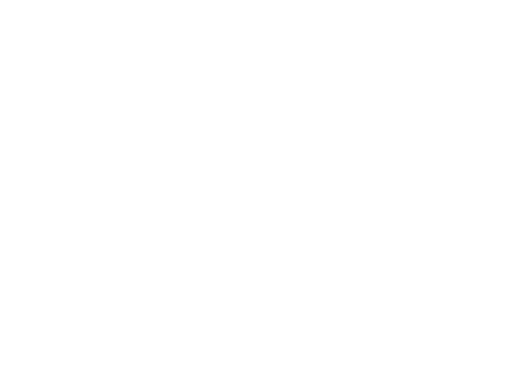

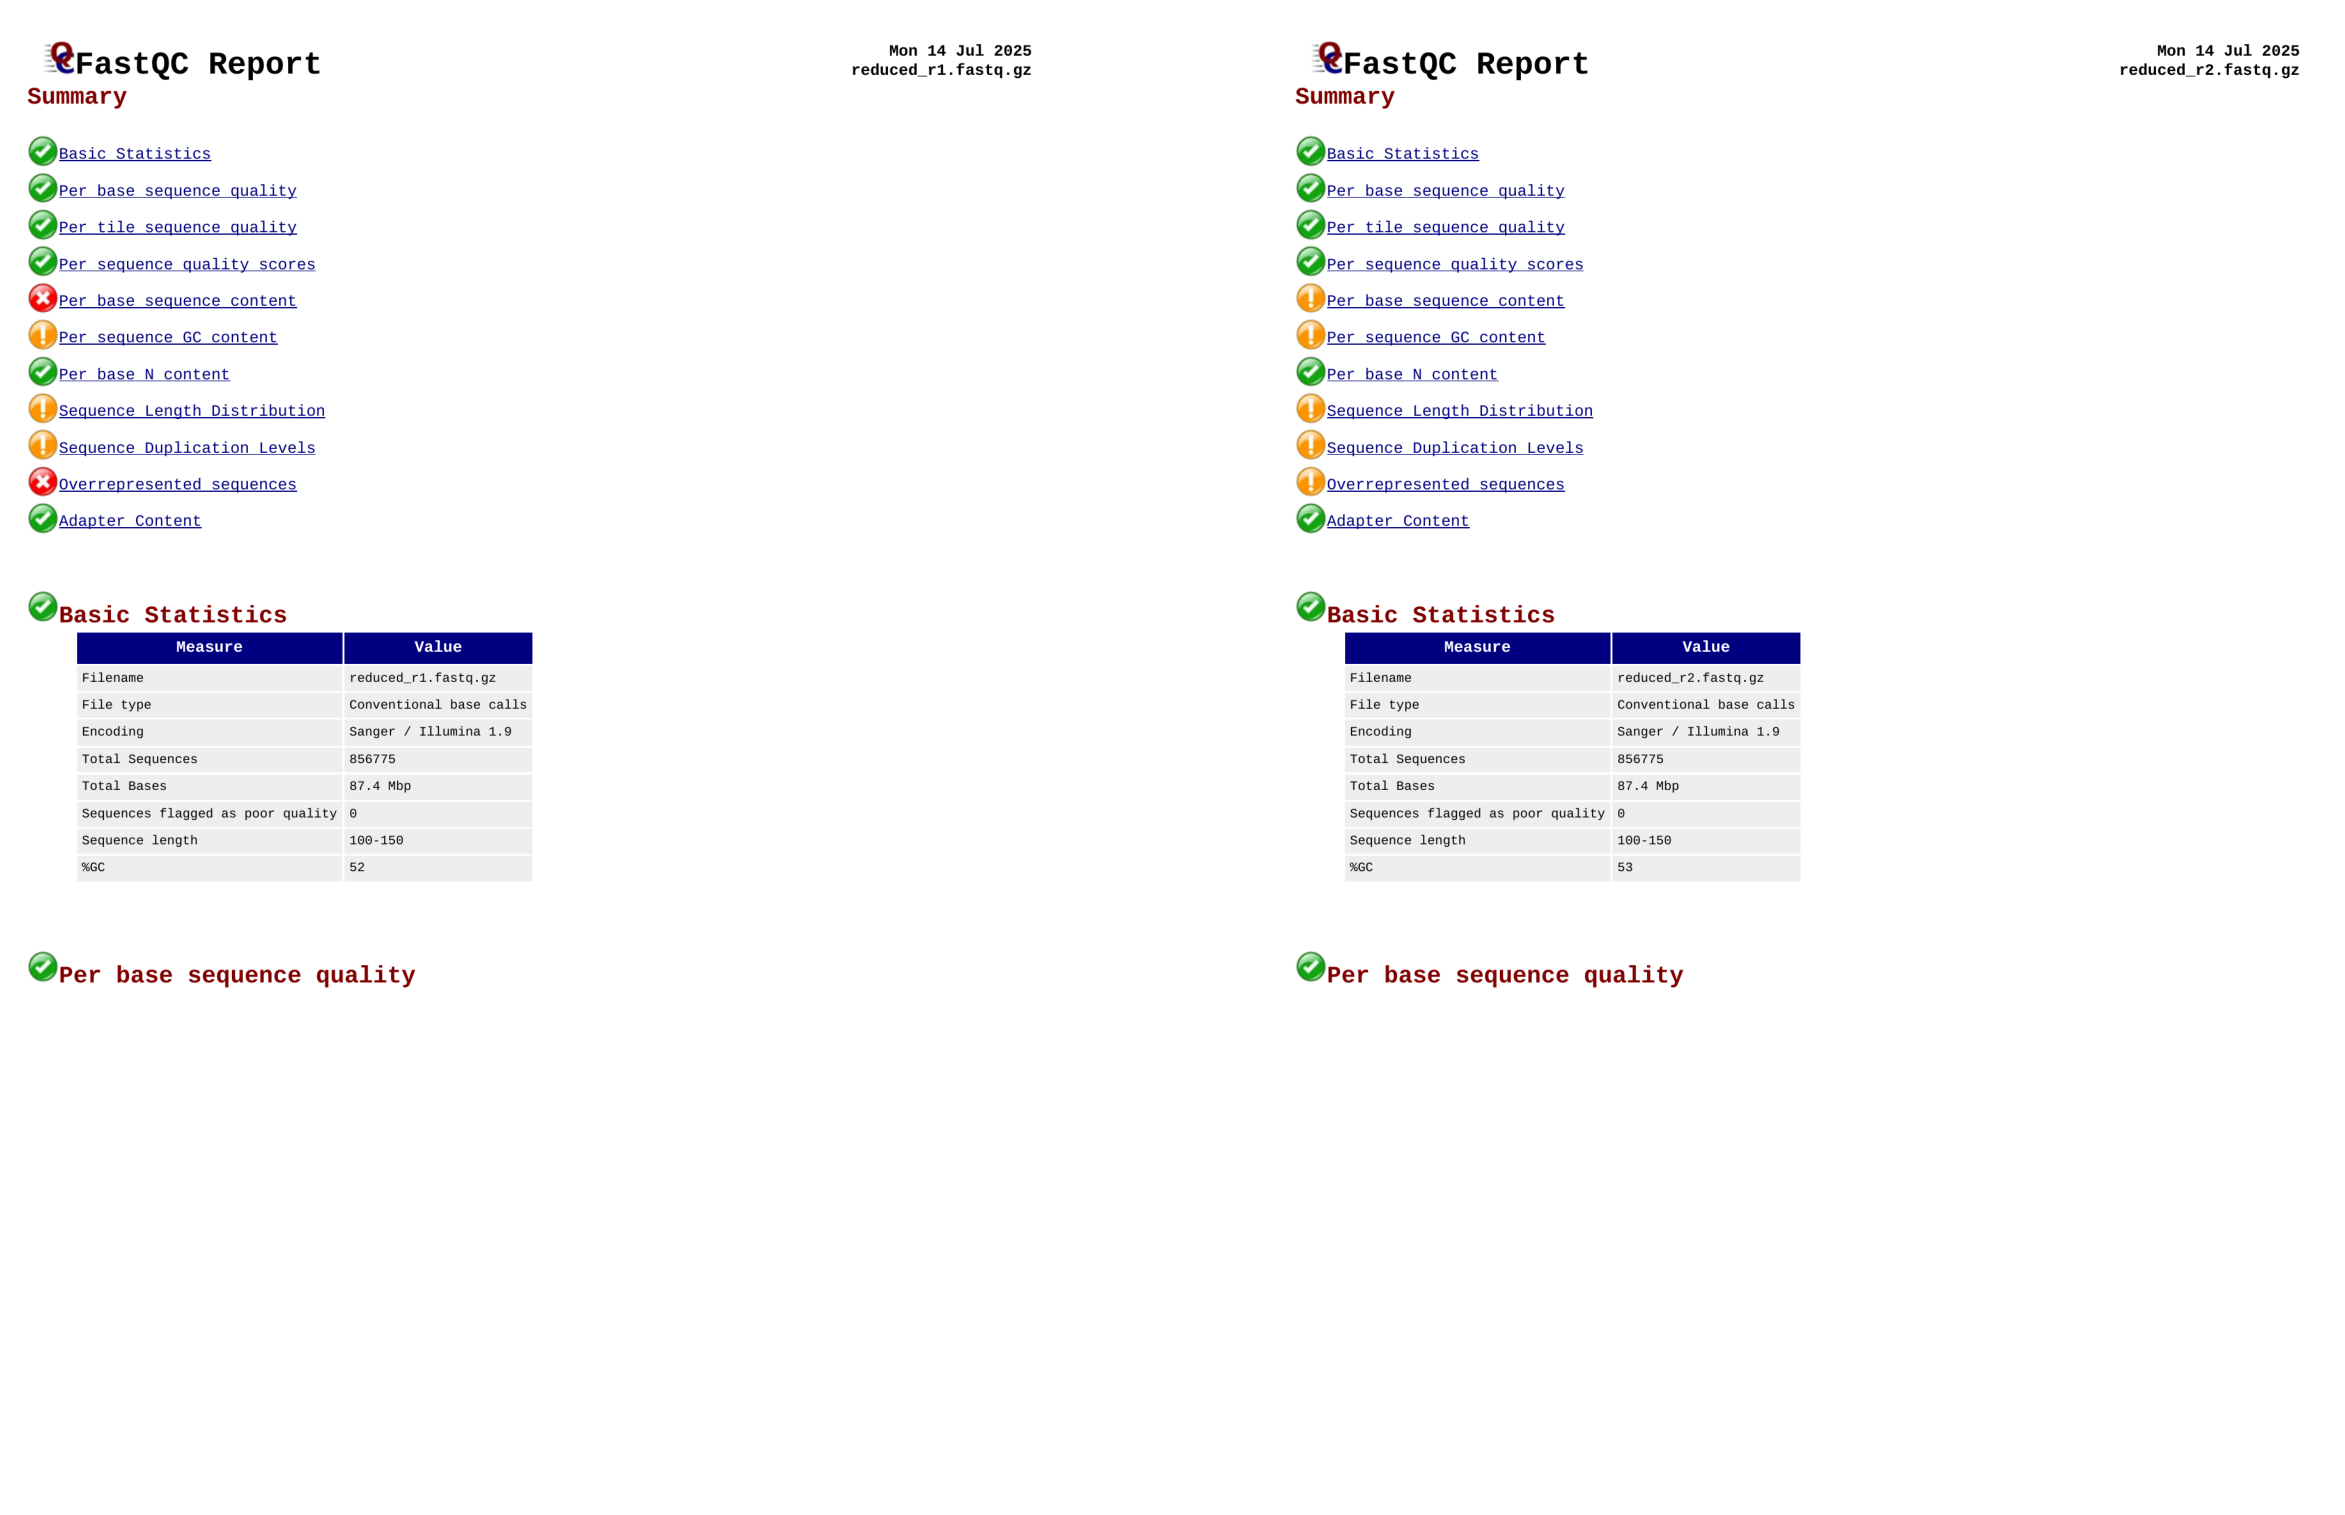

In [23]:
# display the first page of the report
display_page(images_r1, images_r2, 0)


Note the total number of sequences, total number of bases, number of sequences flagged as poor quality, sequence length, and percentage GC content for R1.

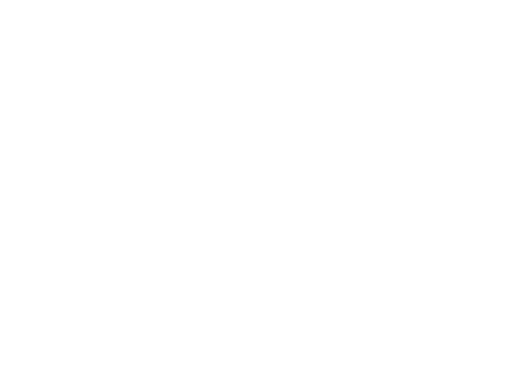

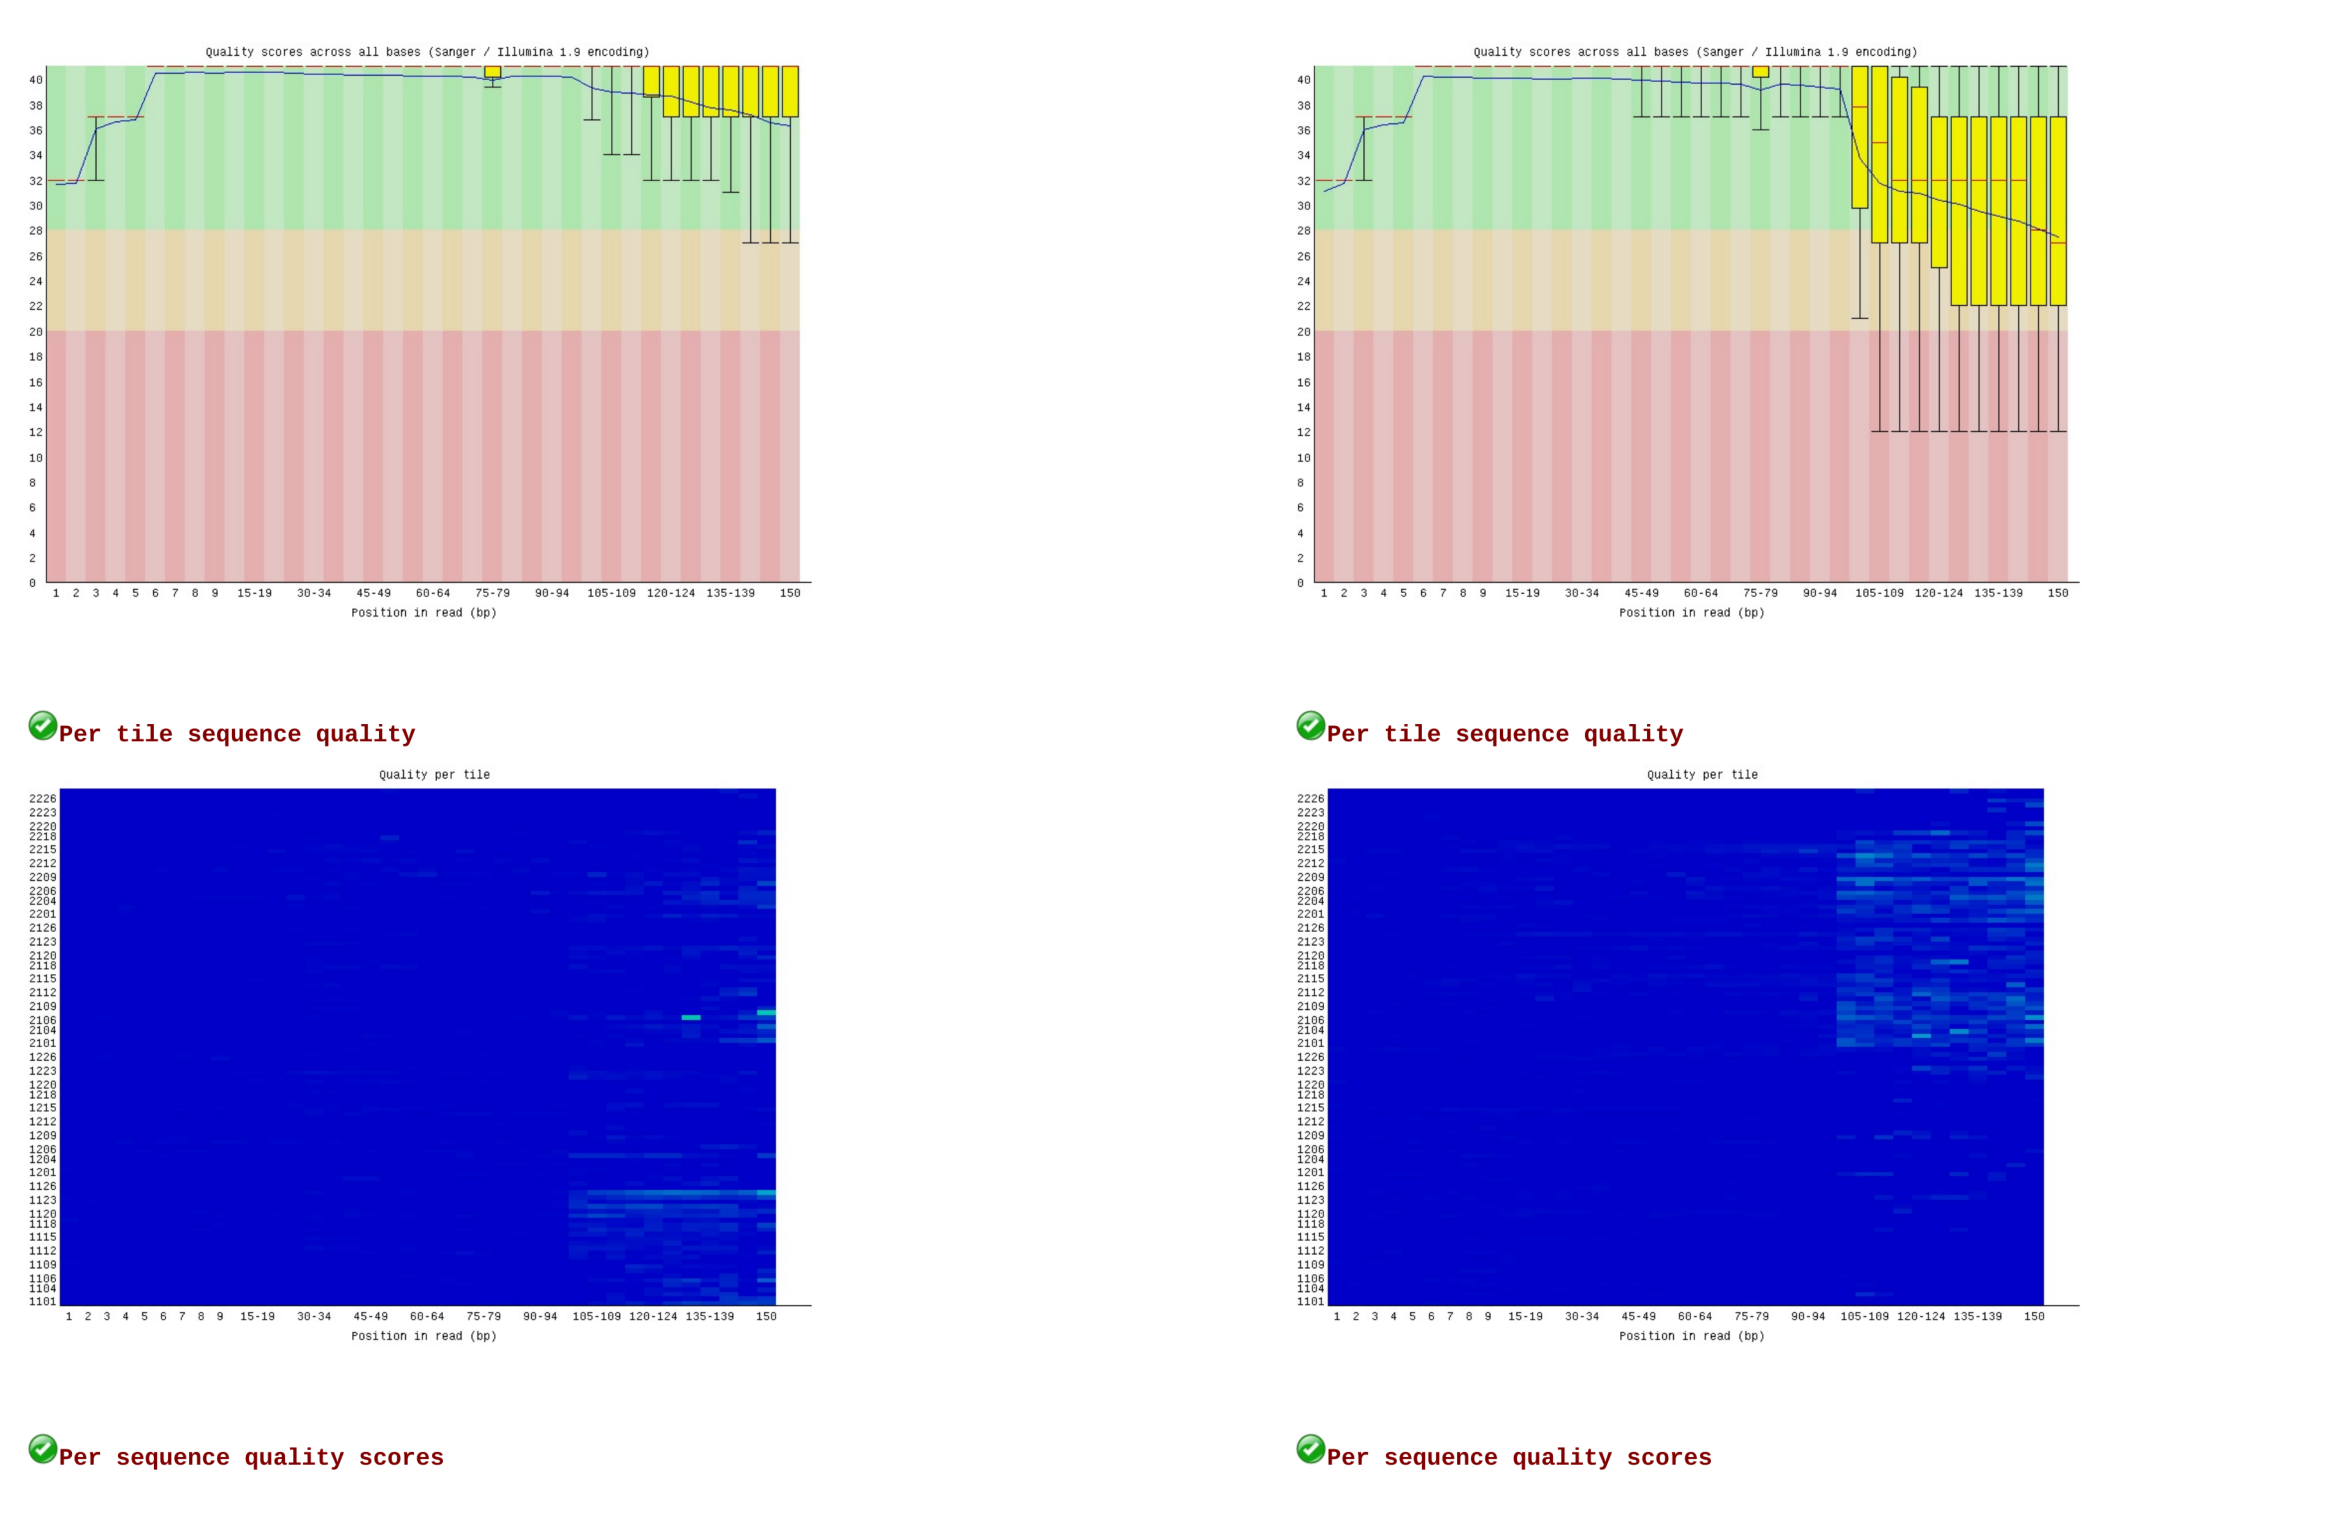

In [24]:
# display the second page of the report
display_page(images_r1, images_r2, 1)

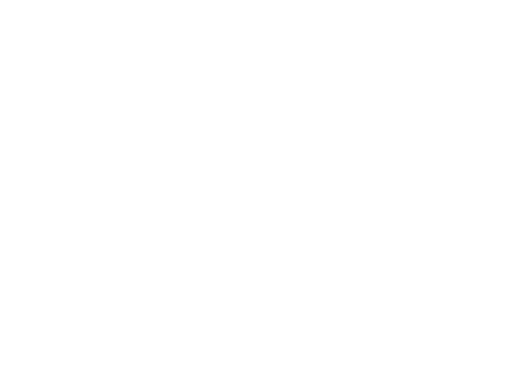

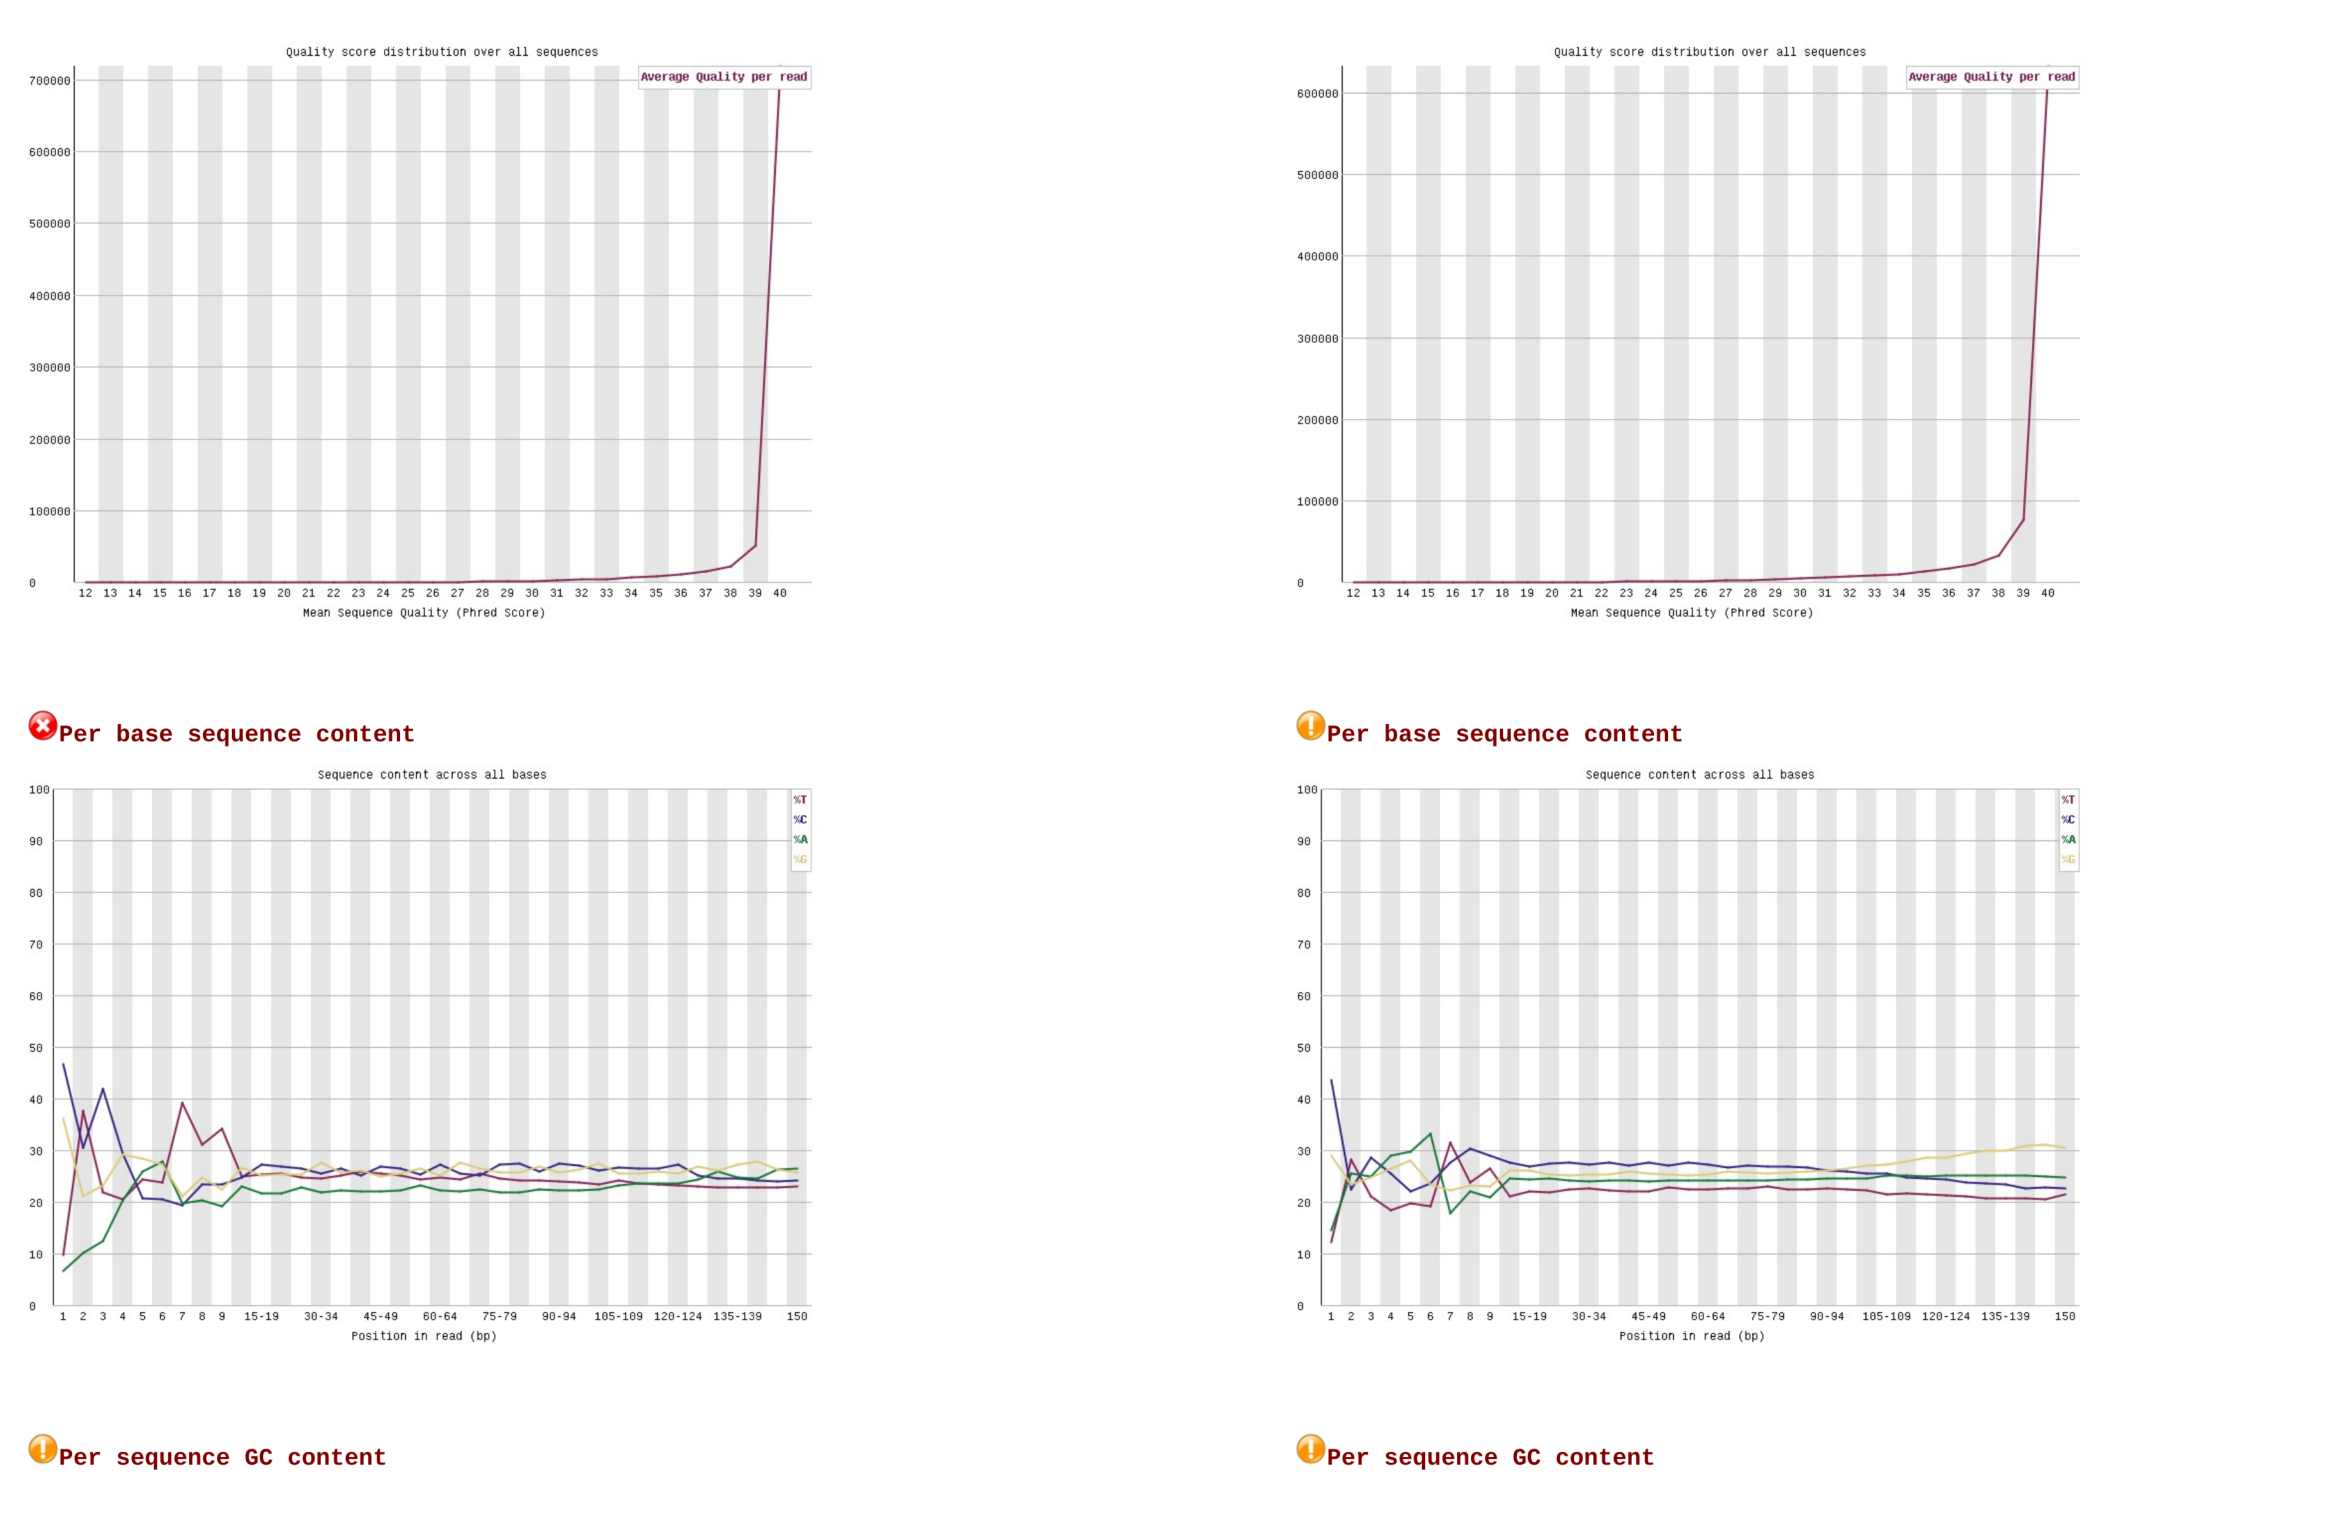

In [25]:
# display the third page of the report
display_page(images_r1, images_r2, 2)

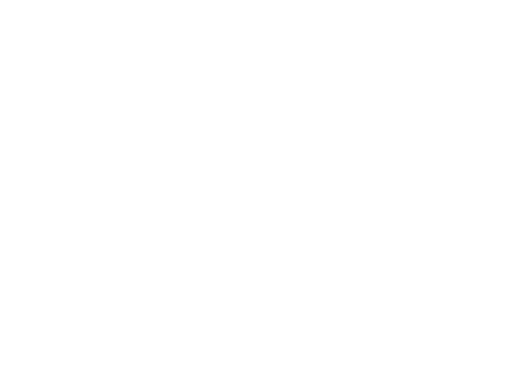

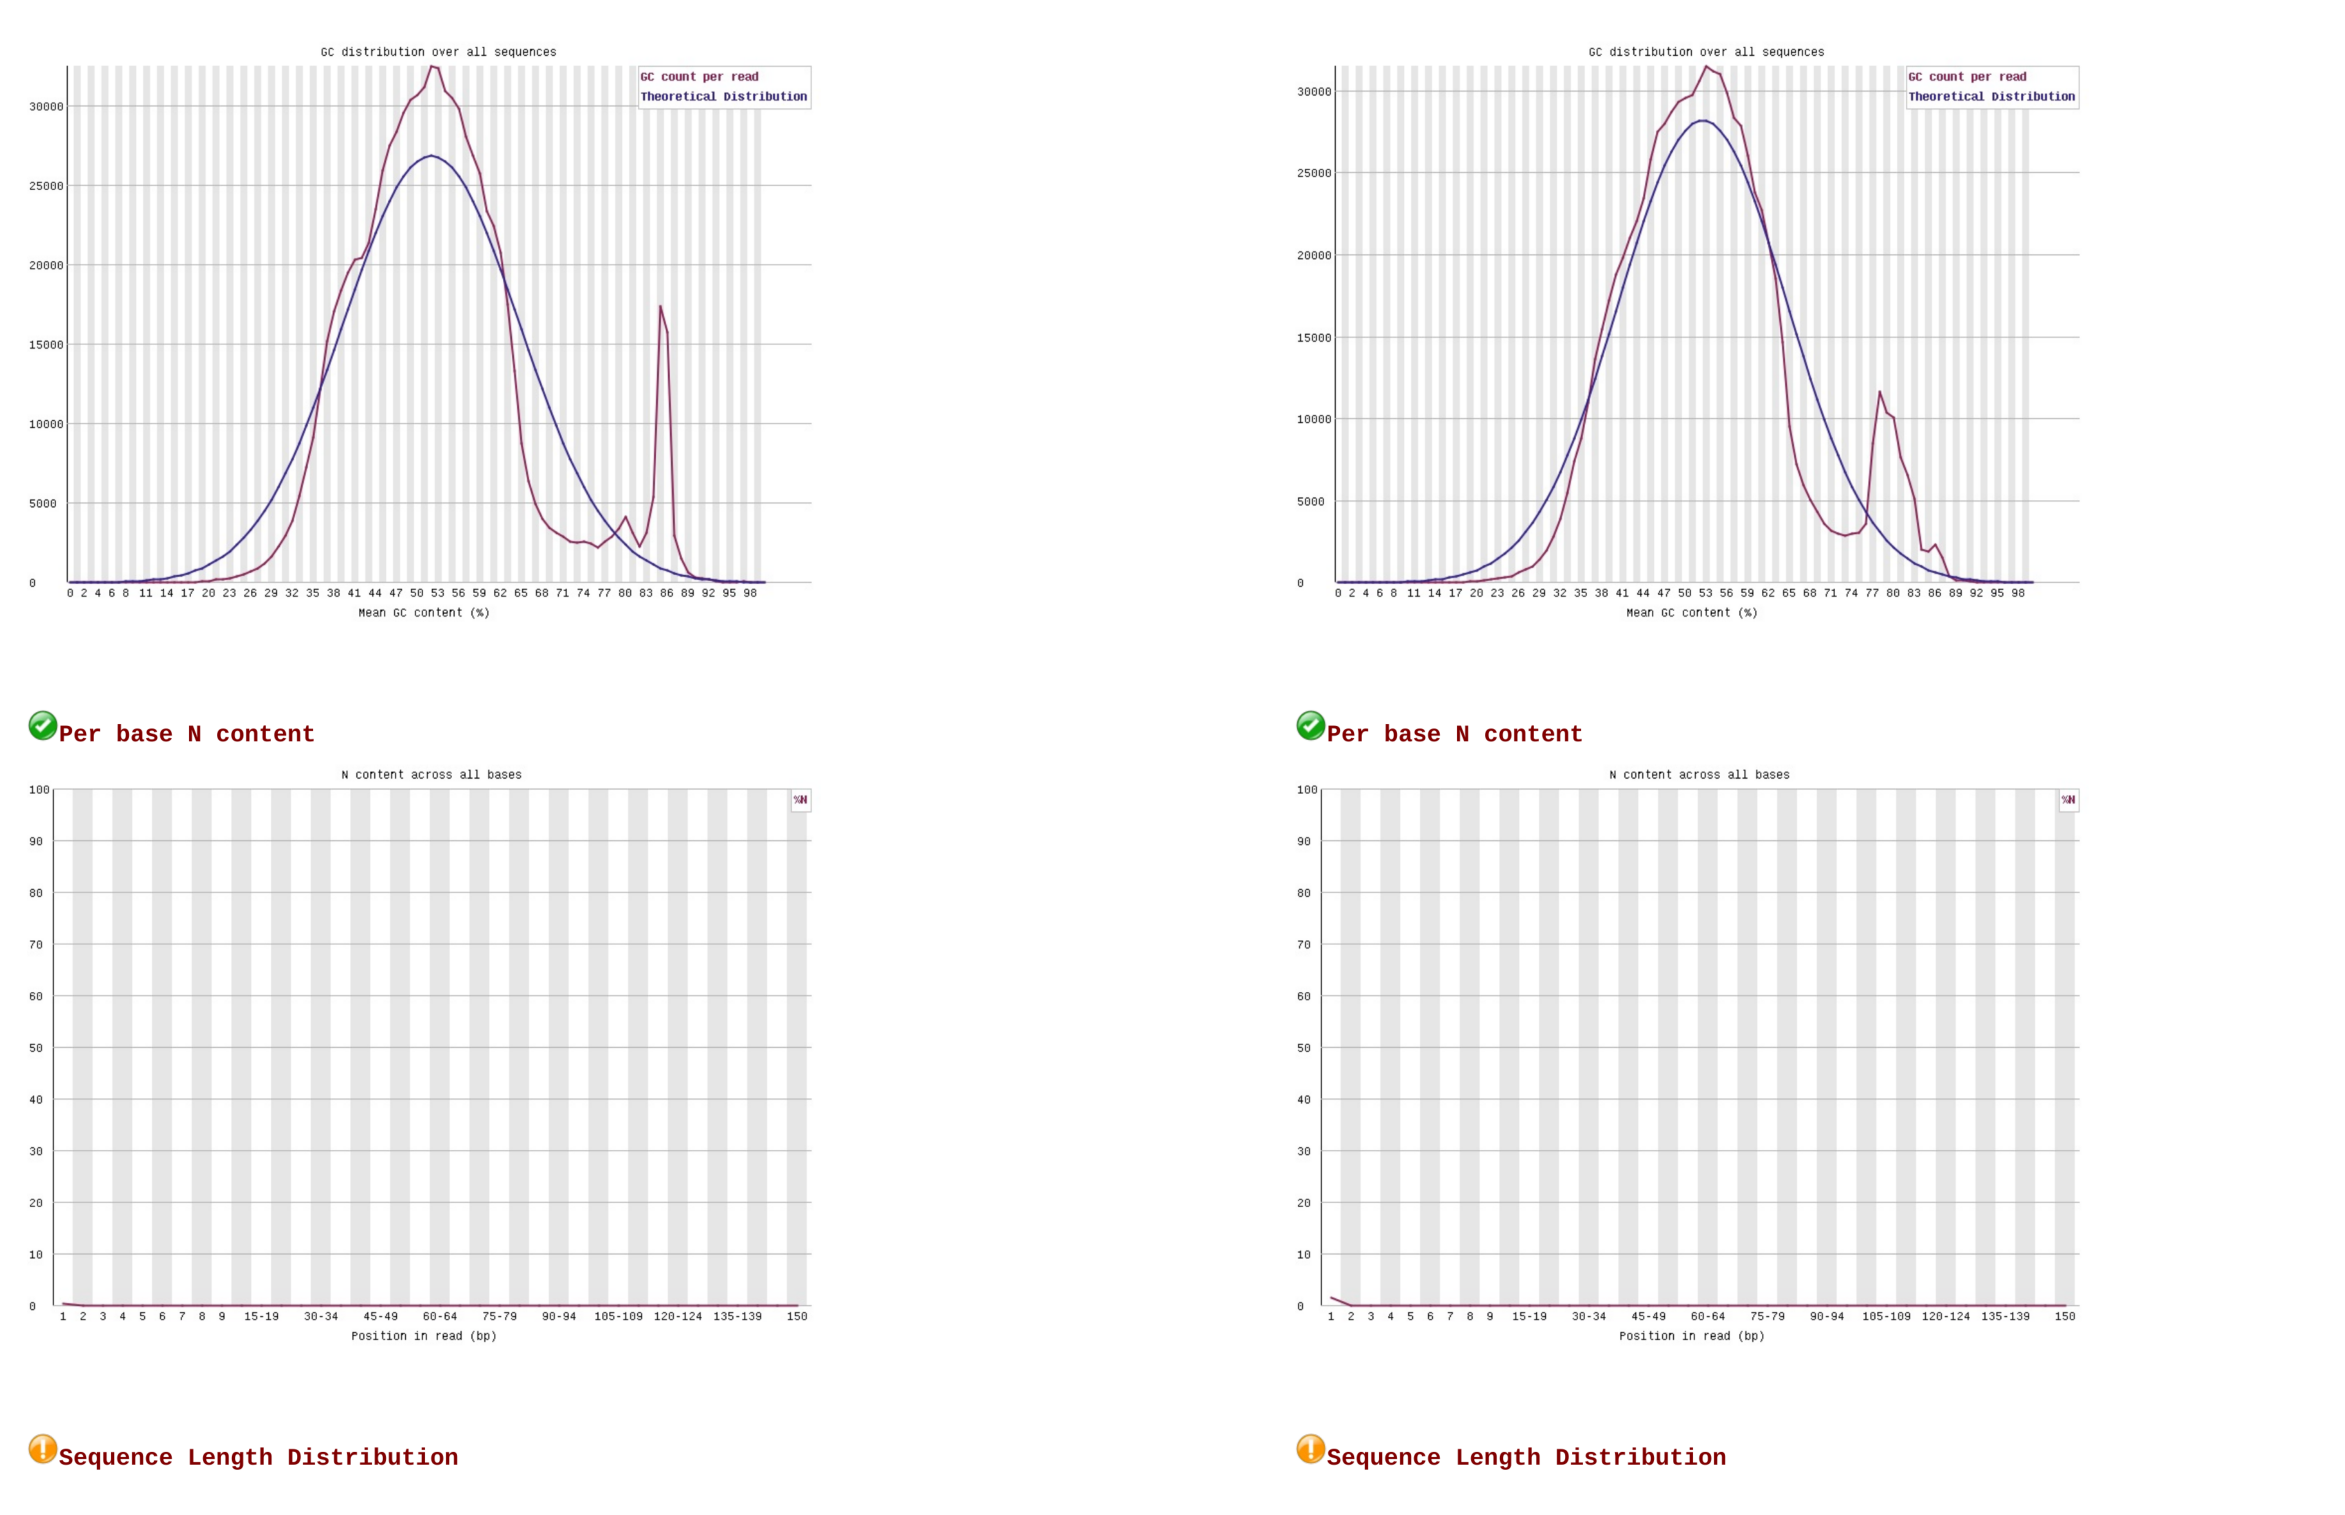

In [26]:
# display the fourth page of the report
display_page(images_r1, images_r2, 3)

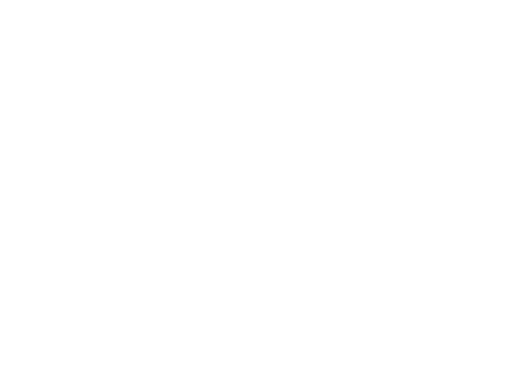

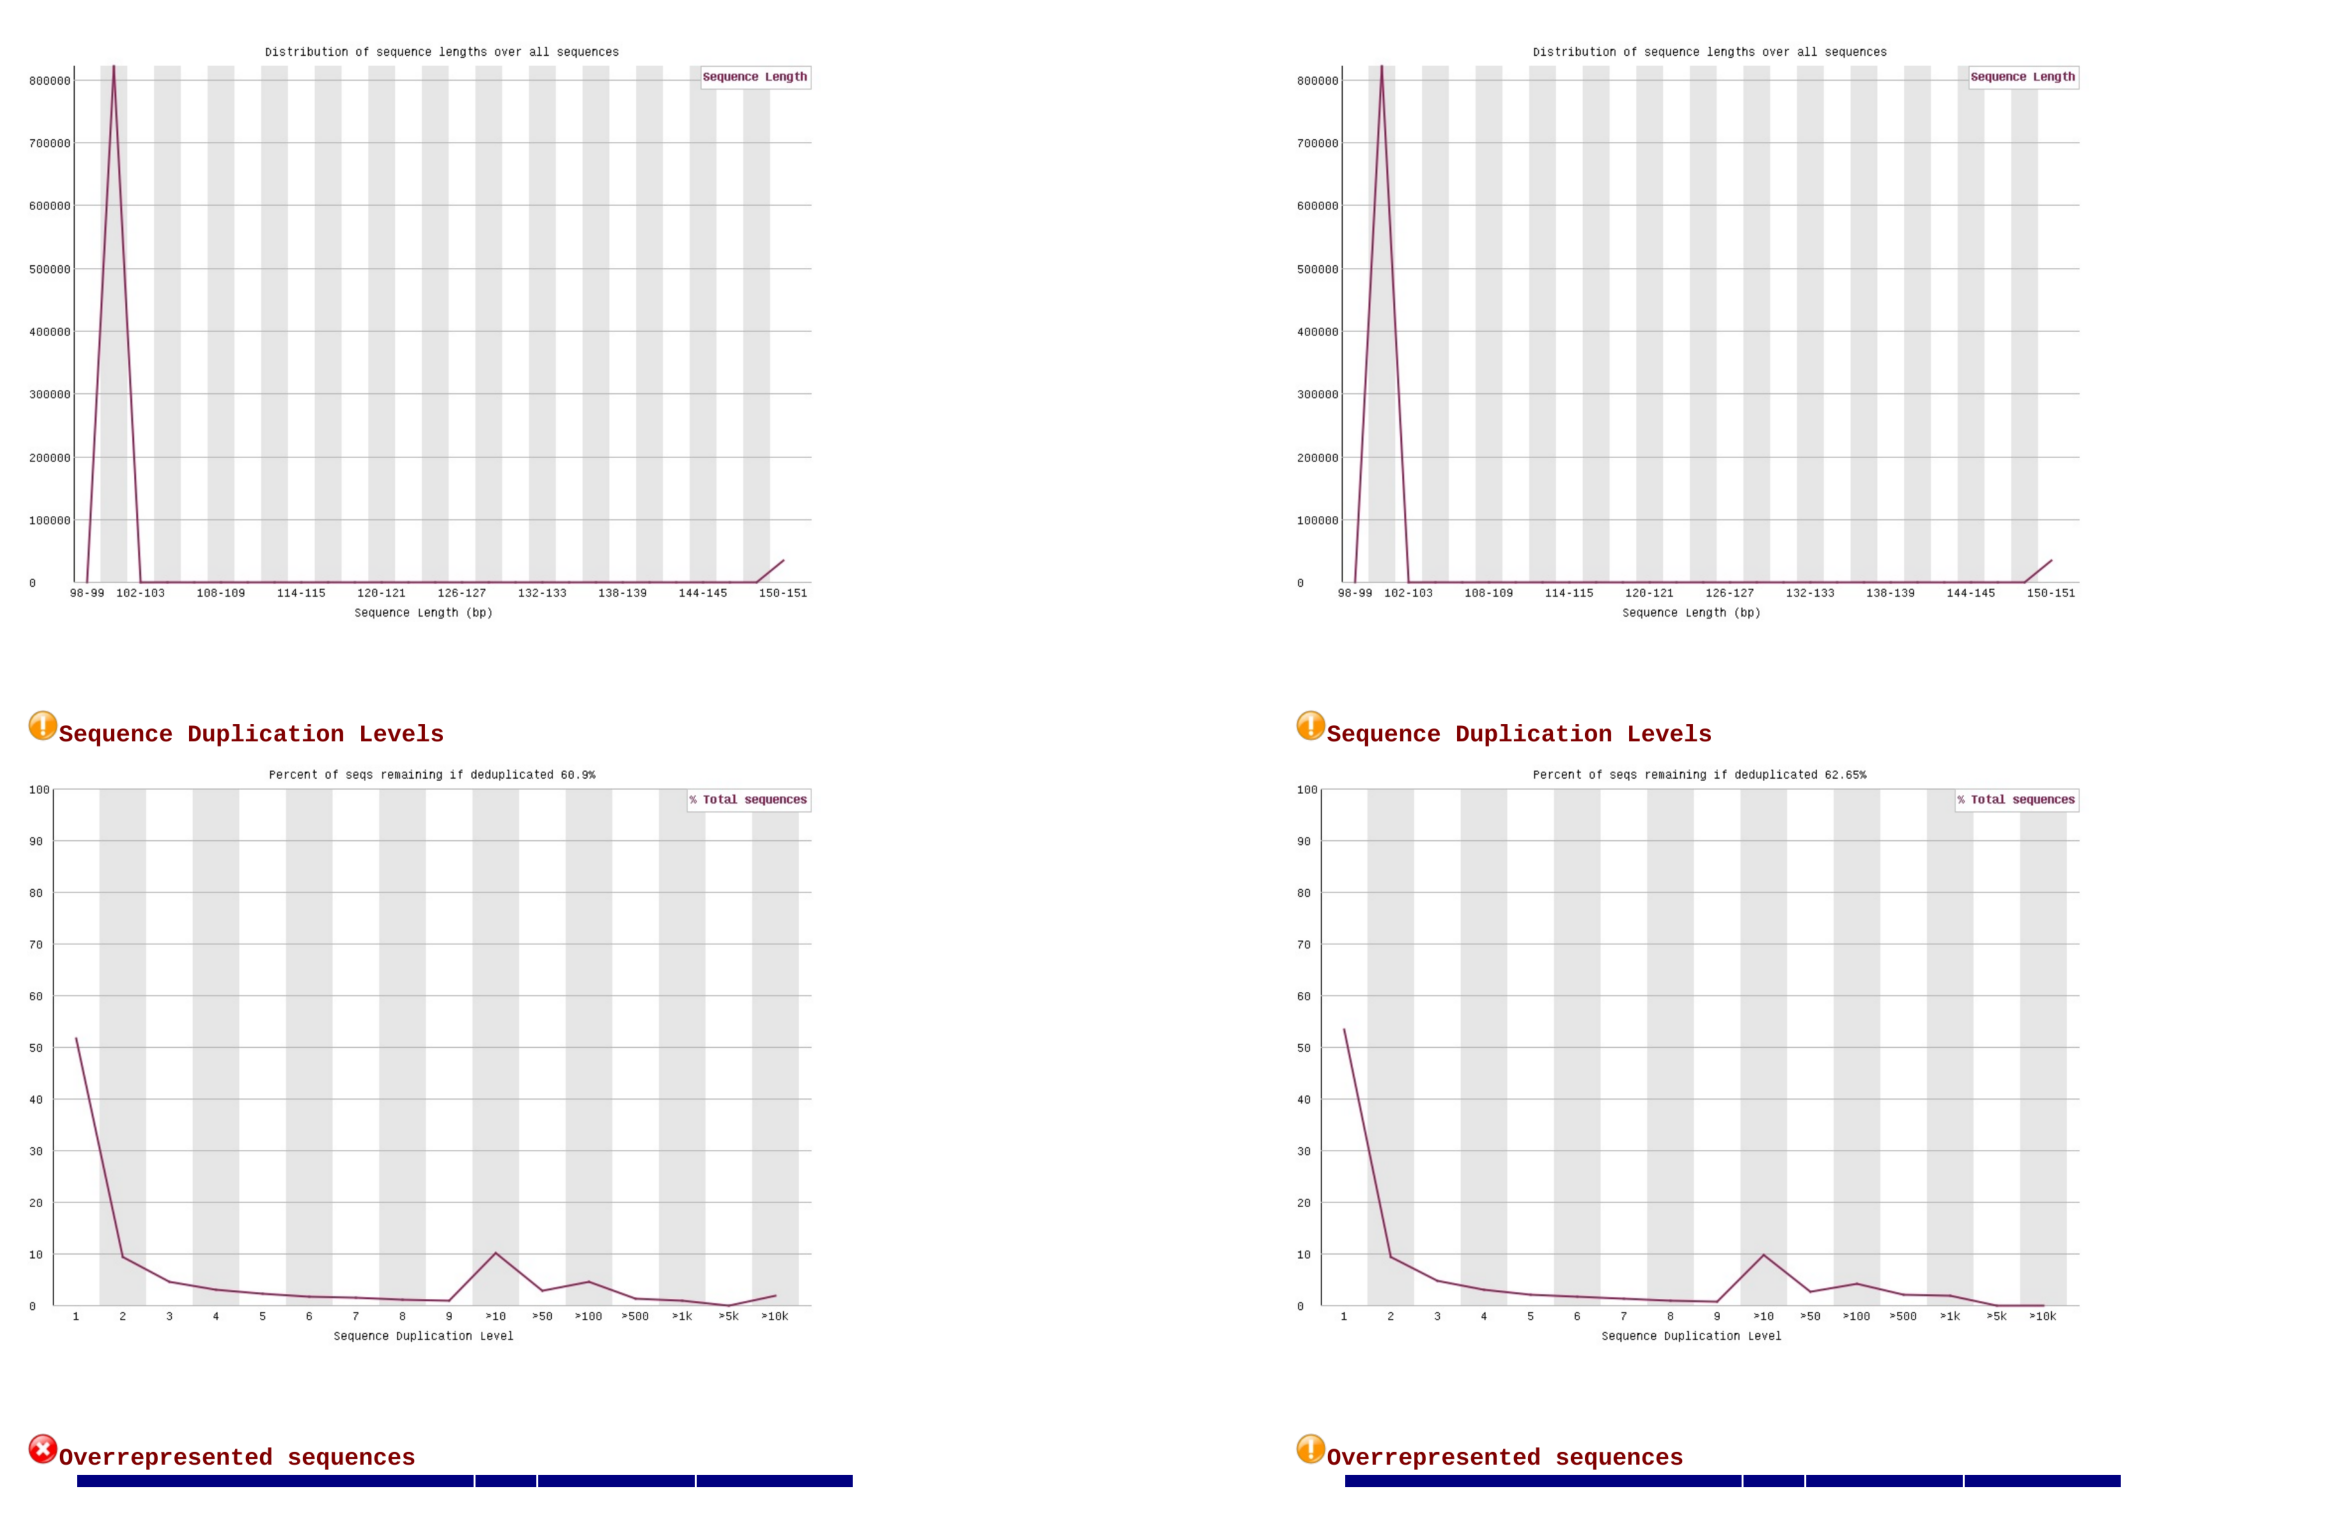

In [27]:
# display the fifth page of the report
display_page(images_r1, images_r2, 4)


# Use `trim_galore` to trim the reads

In [28]:
# Install Trim Galore
import os
if os.path.exists(f"{FASTQ_DIR}/TRIM/TrimGalore-0.6.10/trim_galore"):
  print('trim_galore already installed - removing now to reinstall')
  !rm -rf {FASTQ_DIR}/TRIM
!mkdir {FASTQ_DIR}/TRIM
!wget -O {FASTQ_DIR}/TRIM/trim_galore.tar.gz https://github.com/FelixKrueger/TrimGalore/archive/0.6.10.tar.gz
!curl -fsSL https://github.com/FelixKrueger/TrimGalore/archive/0.6.10.tar.gz -o {FASTQ_DIR}/TRIM/trim_galore.tar.gz
!tar xzf {FASTQ_DIR}/TRIM/trim_galore.tar.gz -C {FASTQ_DIR}/TRIM
# make the trim_galore command executable
!chmod +x {FASTQ_DIR}/TRIM/TrimGalore-0.6.10/trim_galore
# remove the compressed tar file
!rm -f {FASTQ_DIR}/TRIM/trim_galore.tar.gz

mkdir: cannot create directory ‘/content/mnt/MyDrive/NASA/GL4HS/FASTQ/TRIM’: File exists
--2025-07-14 18:40:22--  https://github.com/FelixKrueger/TrimGalore/archive/0.6.10.tar.gz
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/FelixKrueger/TrimGalore/tar.gz/refs/tags/0.6.10 [following]
--2025-07-14 18:40:22--  https://codeload.github.com/FelixKrueger/TrimGalore/tar.gz/refs/tags/0.6.10
Resolving codeload.github.com (codeload.github.com)... 140.82.116.10
Connecting to codeload.github.com (codeload.github.com)|140.82.116.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26831358 (26M) [application/x-gzip]
Saving to: ‘/content/mnt/MyDrive/NASA/GL4HS/FASTQ/TRIM/trim_galore.tar.gz’

/content/mnt/MyDriv 100%[===================>]  25.59M  3.40MB/s    in 7.7s    

2025-07-14 18:40:30 (3.33 MB/s) - ‘/content/mn

In [29]:
# check version of trim_galore
!{FASTQ_DIR}/TRIM/TrimGalore-0.6.10/trim_galore -v


                        Quality-/Adapter-/RRBS-/Speciality-Trimming
                                [powered by Cutadapt]
                                  version 0.6.10

                               Last update: 02 02 2023



In [30]:
# install cutadapt
!pip install cutadapt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.3/275.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.8/260.8 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.2/108.2 kB 9.5 MB/s eta 0:00:00


In [31]:
# find path to cutadapt executable
!which cutadapt

/usr/local/bin/cutadapt


In [32]:
# run trim_galore on R1 and R2
# use the path_to_cutadapt path you found in the previous code cell
if os.path.exists(f"{FASTQ_DIR}/TRIM/PAIRED"):
  !rm -rf {FASTQ_DIR}/TRIM/PAIRED
!mkdir -p {FASTQ_DIR}/TRIM/PAIRED

!{FASTQ_DIR}/TRIM/TrimGalore-0.6.10/trim_galore \
  --path_to_cutadapt /usr/local/bin/cutadapt \
  --paired \
  -o {FASTQ_DIR}/TRIM/PAIRED \
  -q 20 \
  -j 2 \
  {FASTQ_DIR}/reduced_r1.fastq.gz \
  {FASTQ_DIR}/reduced_r2.fastq.gz


Path to Cutadapt set as: '/usr/local/bin/cutadapt' (user defined)
Cutadapt seems to be working fine (tested command '/usr/local/bin/cutadapt --version')
Cutadapt version: 5.1
Cutadapt seems to be using Python 3! Proceeding with multi-core enabled Cutadapt using 2 cores
pigz 2.6
Parallel gzip (pigz) detected. Proceeding with multicore (de)compression using 2 cores

Proceeding with 'pigz -p 2' for decompression
To decrease CPU usage of decompression, please install 'igzip' and run again

No quality encoding type selected. Assuming that the data provided uses Sanger encoded Phred scores (default)

Output will be written into the directory: /content/mnt/MyDrive/NASA/GL4HS/FASTQ/TRIM/PAIRED/


AUTO-DETECTING ADAPTER TYPE
Attempting to auto-detect adapter type from the first 1 million sequences of the first file (>> /content/mnt/MyDrive/NASA/GL4HS/FASTQ/reduced_r1.fastq.gz <<)

Found perfect matches for the following adapter sequences:
Adapter type	Count	Sequence	Sequences analysed	Percentag

Note the following:
1. which adapter sequence was auto-detected and most prevalent?
2. what is the minimum required sequence length for both reads before a sequence pair gets removed?
3. approximately what percentage of sequence pairs were removed because at least one read was shorter than the length cutoff?
4. which base was the most prevalent preceding removed adapters?

In [33]:
# validate the trimmed output files got created
# should be about 2.1GB each
!ls -lh {FASTQ_DIR}/TRIM/PAIRED


total 86M
-rw------- 1 root root 3.6K Jul 14 18:41 reduced_r1.fastq.gz_trimming_report.txt
-rw------- 1 root root  42M Jul 14 18:42 reduced_r1_val_1.fq.gz
-rw------- 1 root root 3.8K Jul 14 18:42 reduced_r2.fastq.gz_trimming_report.txt
-rw------- 1 root root  44M Jul 14 18:42 reduced_r2_val_2.fq.gz


In [34]:
# examine trimming report (or refer student cell with trim command that also has output)
#!cat {FASTQ_DIR}/TRIM/R1/reduced_r1.fastq.gz_trimming_report.txt
#!cat {FASTQ_DIR}/TRIM/R2/reduced_r2.fastq.gz_trimming_report.txt

# Run FastQC to check the quality of FASTQ file after trimming

In this section, the images we display on the left will be the pre-trimming images for R1 only and the images on the right will be the corresponding post-trimming images for R1 only. We will not compare pre- and post-trimming reports for R2.

In [35]:
# repeat FastQC run and examine quality scores across all bases + quality score distribution for R1
# TODO do some sort of before-and-after side-by-side comparison of plots
if os.path.exists(f"{FASTQ_DIR}/TRIM/R1/FASTQC_OUT"):
  !rm -rf {FASTQ_DIR}/TRIM/R1/FASTQC_OUT
!mkdir -p {FASTQ_DIR}/TRIM/R1/FASTQC_OUT
!{FASTQ_DIR}/FastQC/fastqc  {FASTQ_DIR}/TRIM/PAIRED/reduced_r1_val_1.fq.gz -o {FASTQ_DIR}/TRIM/R1/FASTQC_OUT

application/gzip
Started analysis of reduced_r1_val_1.fq.gz
Approx 5% complete for reduced_r1_val_1.fq.gz
Approx 10% complete for reduced_r1_val_1.fq.gz
Approx 15% complete for reduced_r1_val_1.fq.gz
Approx 20% complete for reduced_r1_val_1.fq.gz
Approx 25% complete for reduced_r1_val_1.fq.gz
Approx 30% complete for reduced_r1_val_1.fq.gz
Approx 35% complete for reduced_r1_val_1.fq.gz
Approx 40% complete for reduced_r1_val_1.fq.gz
Approx 45% complete for reduced_r1_val_1.fq.gz
Approx 50% complete for reduced_r1_val_1.fq.gz
Approx 55% complete for reduced_r1_val_1.fq.gz
Approx 60% complete for reduced_r1_val_1.fq.gz
Approx 65% complete for reduced_r1_val_1.fq.gz
Approx 70% complete for reduced_r1_val_1.fq.gz
Approx 75% complete for reduced_r1_val_1.fq.gz
Approx 80% complete for reduced_r1_val_1.fq.gz
Approx 85% complete for reduced_r1_val_1.fq.gz
Approx 90% complete for reduced_r1_val_1.fq.gz
Approx 95% complete for reduced_r1_val_1.fq.gz
Analysis complete for reduced_r1_val_1.fq.gz


In [36]:
# convert HTML to pdf
!wkhtmltopdf {FASTQ_DIR}/TRIM/R1/FASTQC_OUT/reduced_r1_val_1_fastqc.html {FASTQ_DIR}/TRIM/R1/FASTQC_OUT/out.pdf

QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Loading page (1/2)
Printing pages (2/2)                                               
Done                                                           


In [37]:
# convert PDF to pillow image
from pdf2image import convert_from_path
images_r1_trim = convert_from_path(f"{FASTQ_DIR}/TRIM/R1/FASTQC_OUT/out.pdf")
print('len = ', str(len(images_r1_trim)))

len =  6


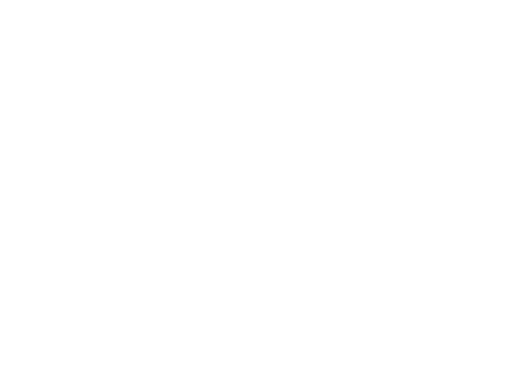

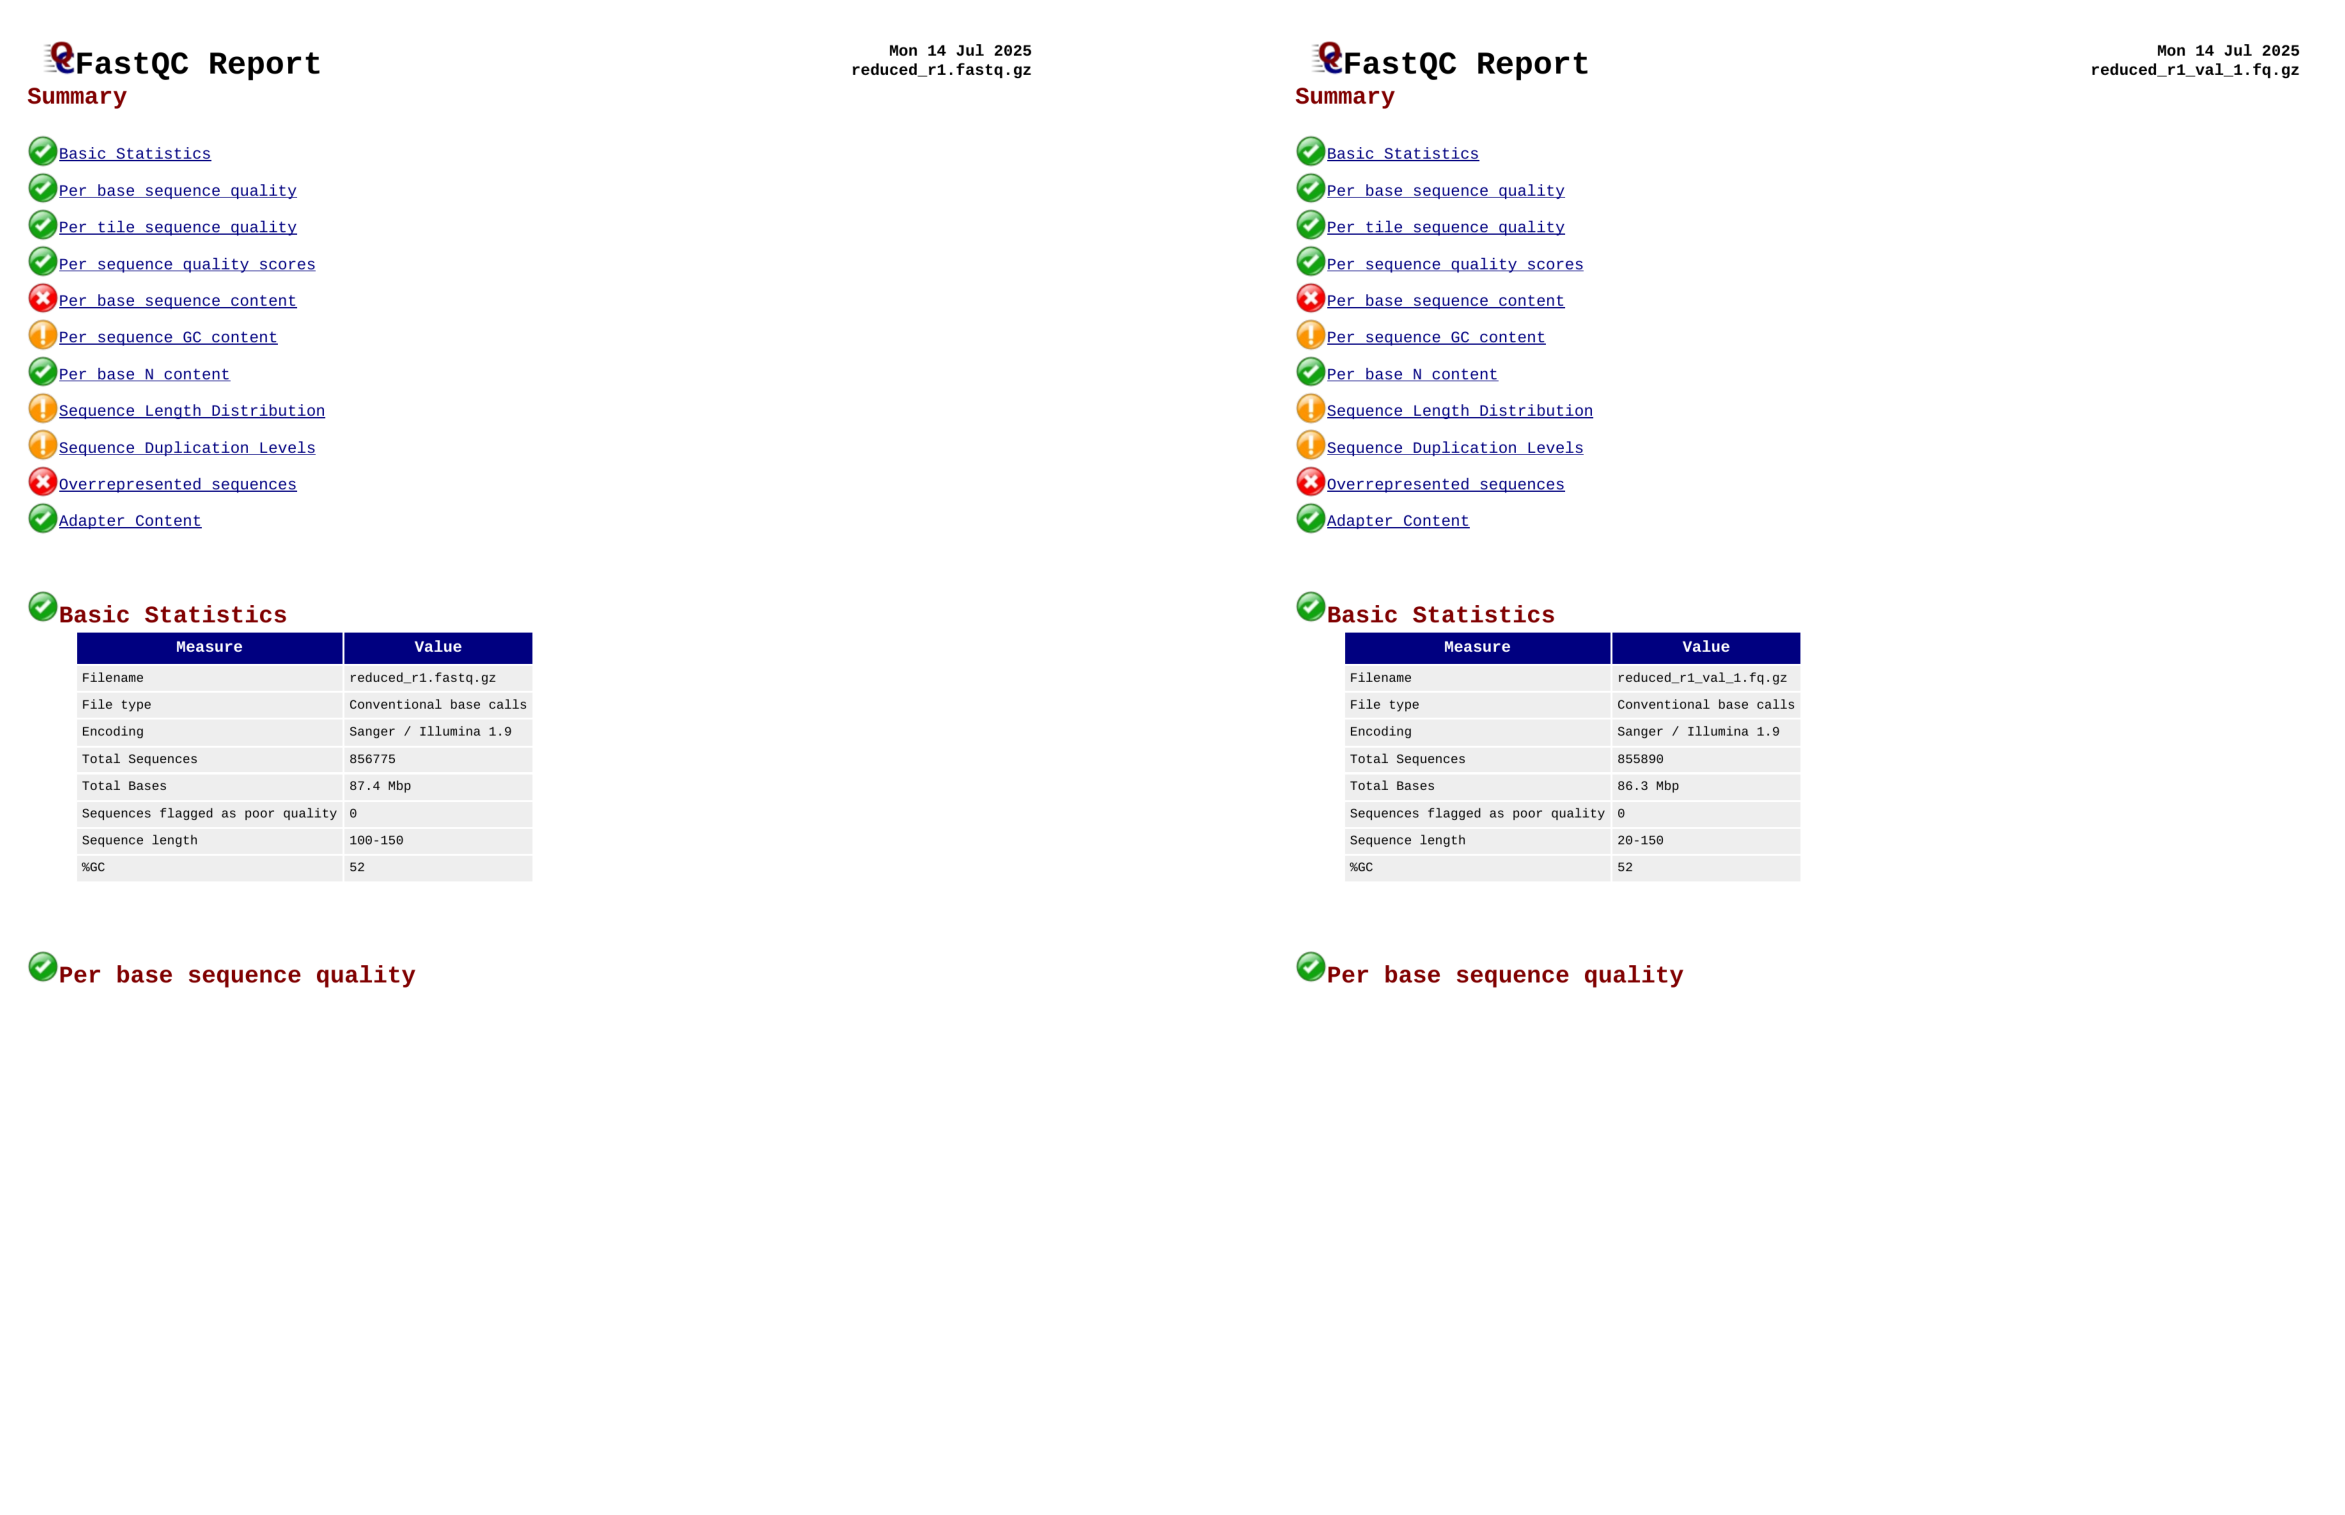

In [38]:
# compare first page of FastQC output for pre- and post-trim R1 data
#left: before trim | right: after trim (only r1)
display_page(images_r1, images_r1_trim, 0)

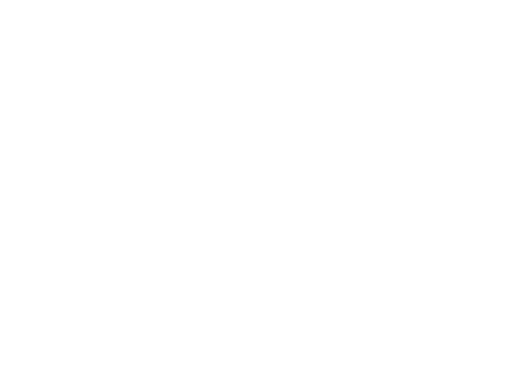

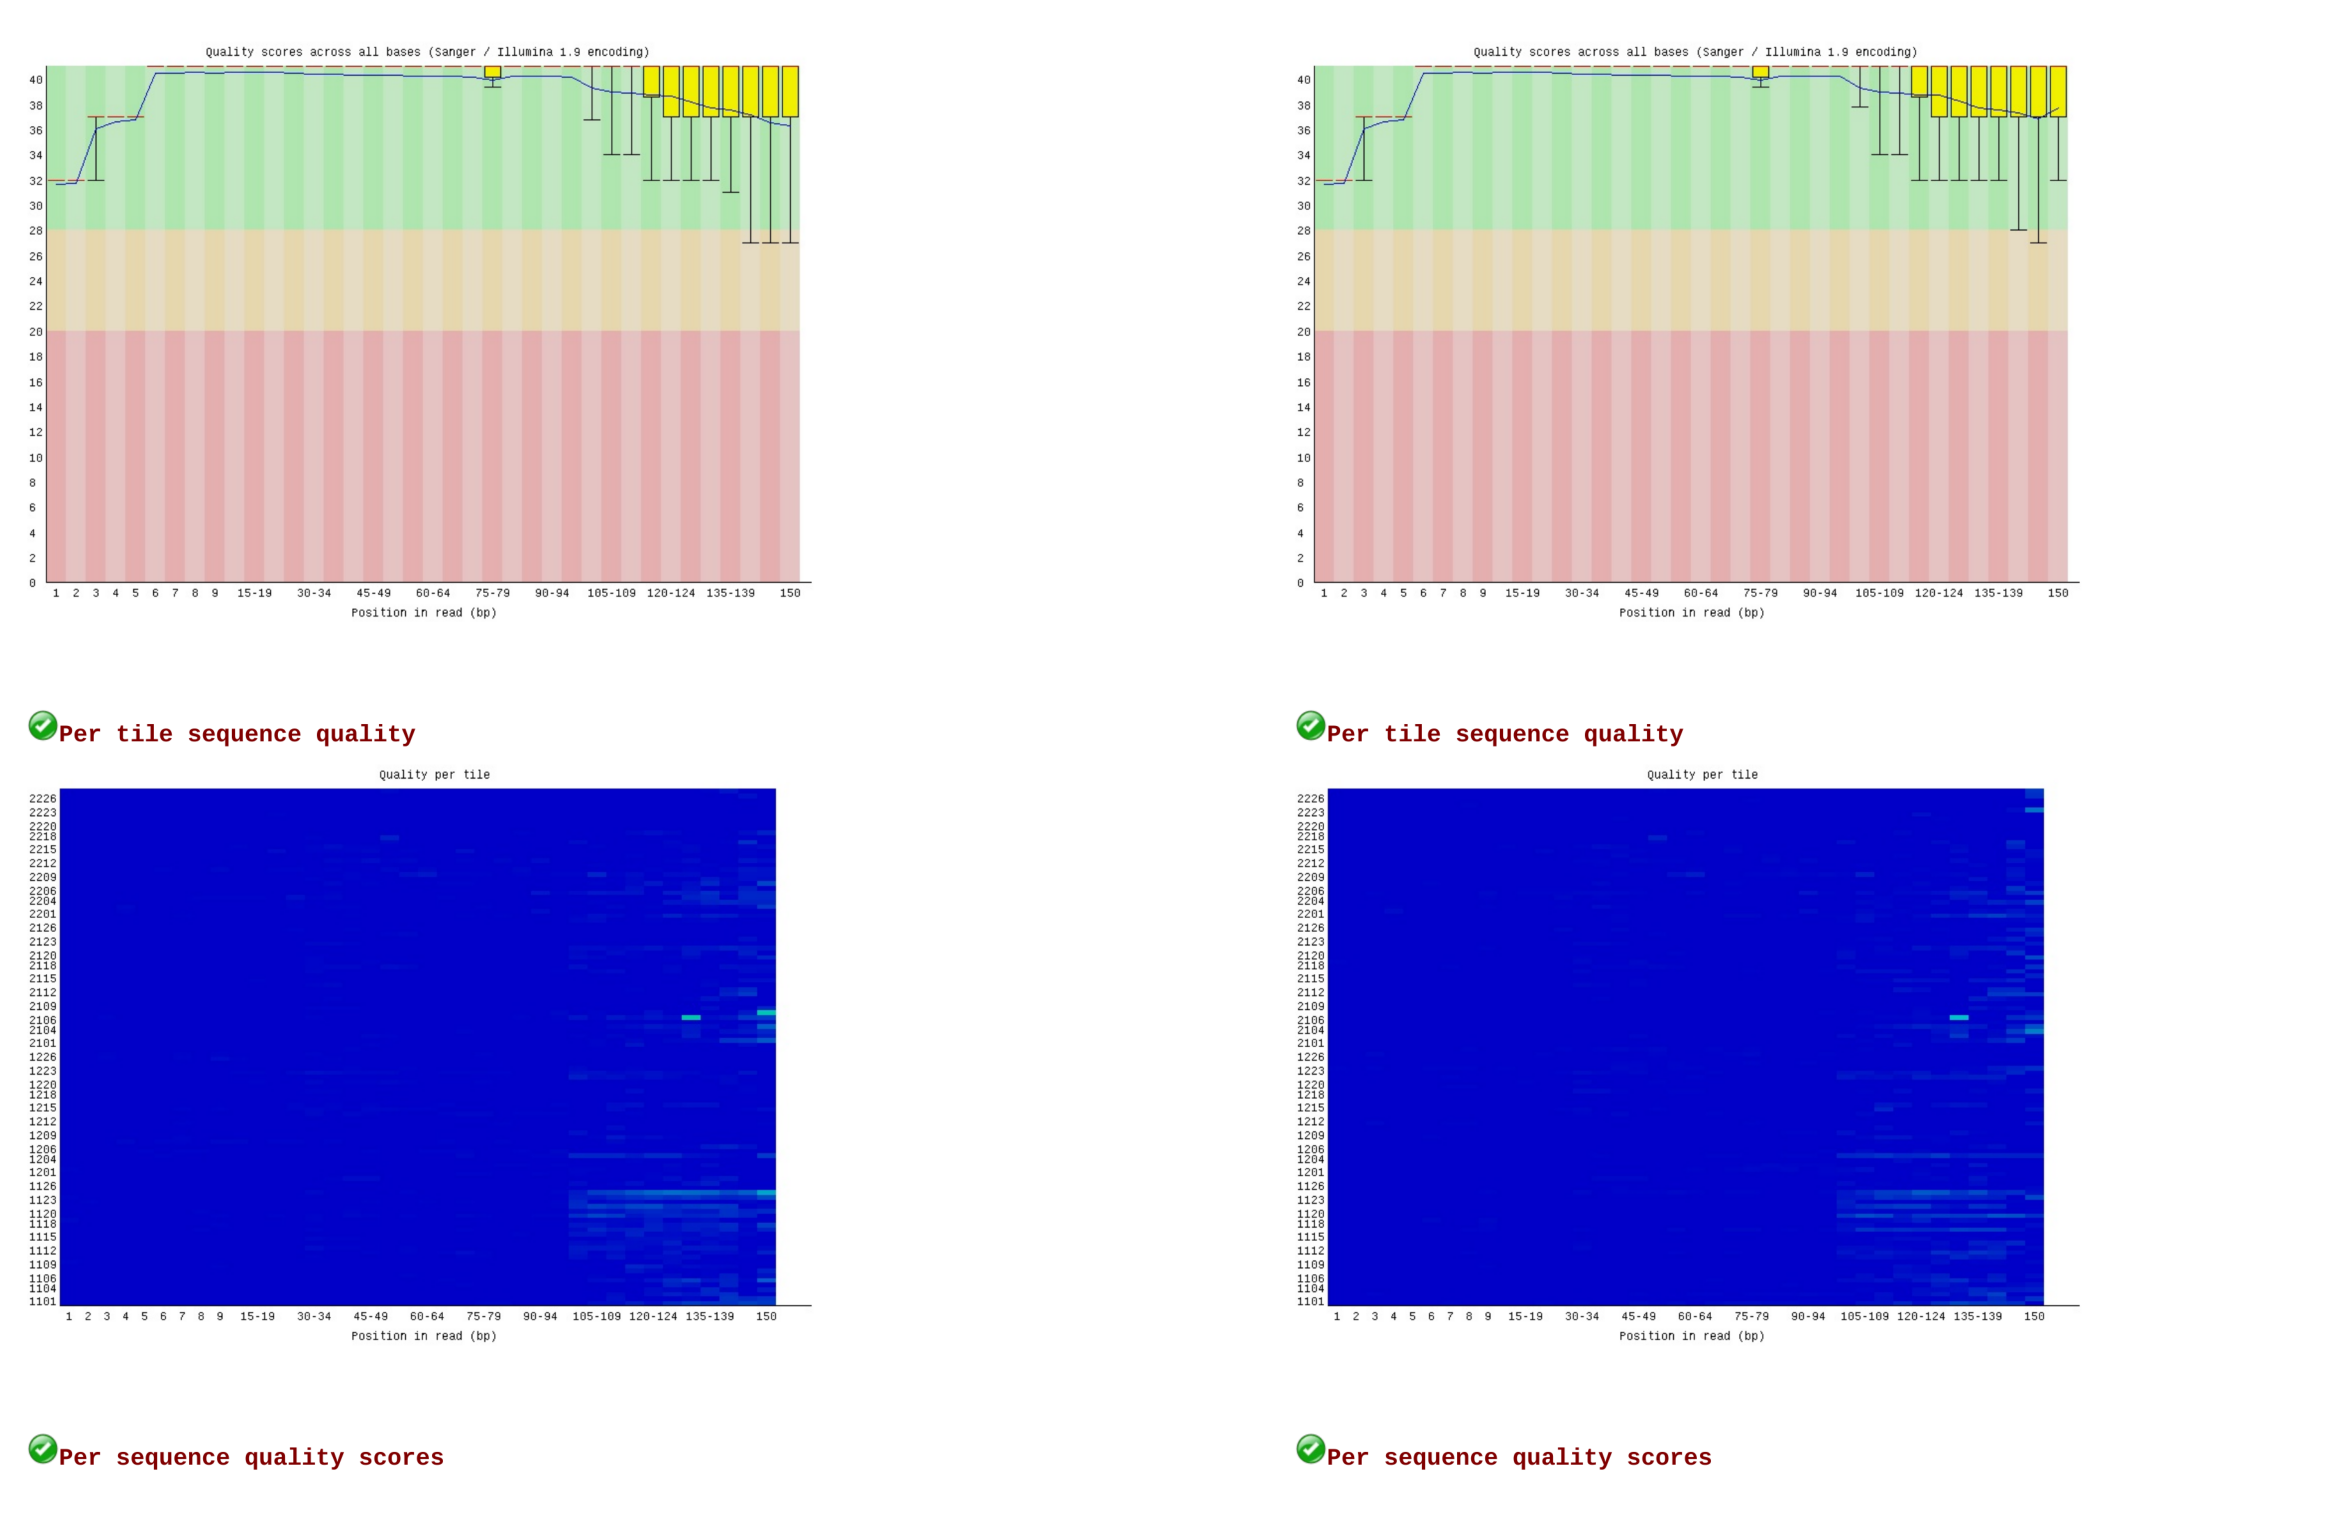

In [39]:
# compare second page of FastQC output for pre- and post-trim R1 data
display_page(images_r1, images_r1_trim, 1)

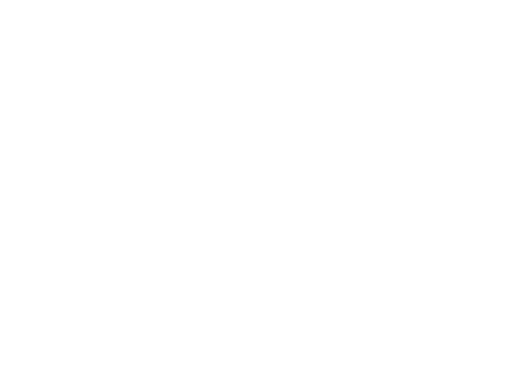

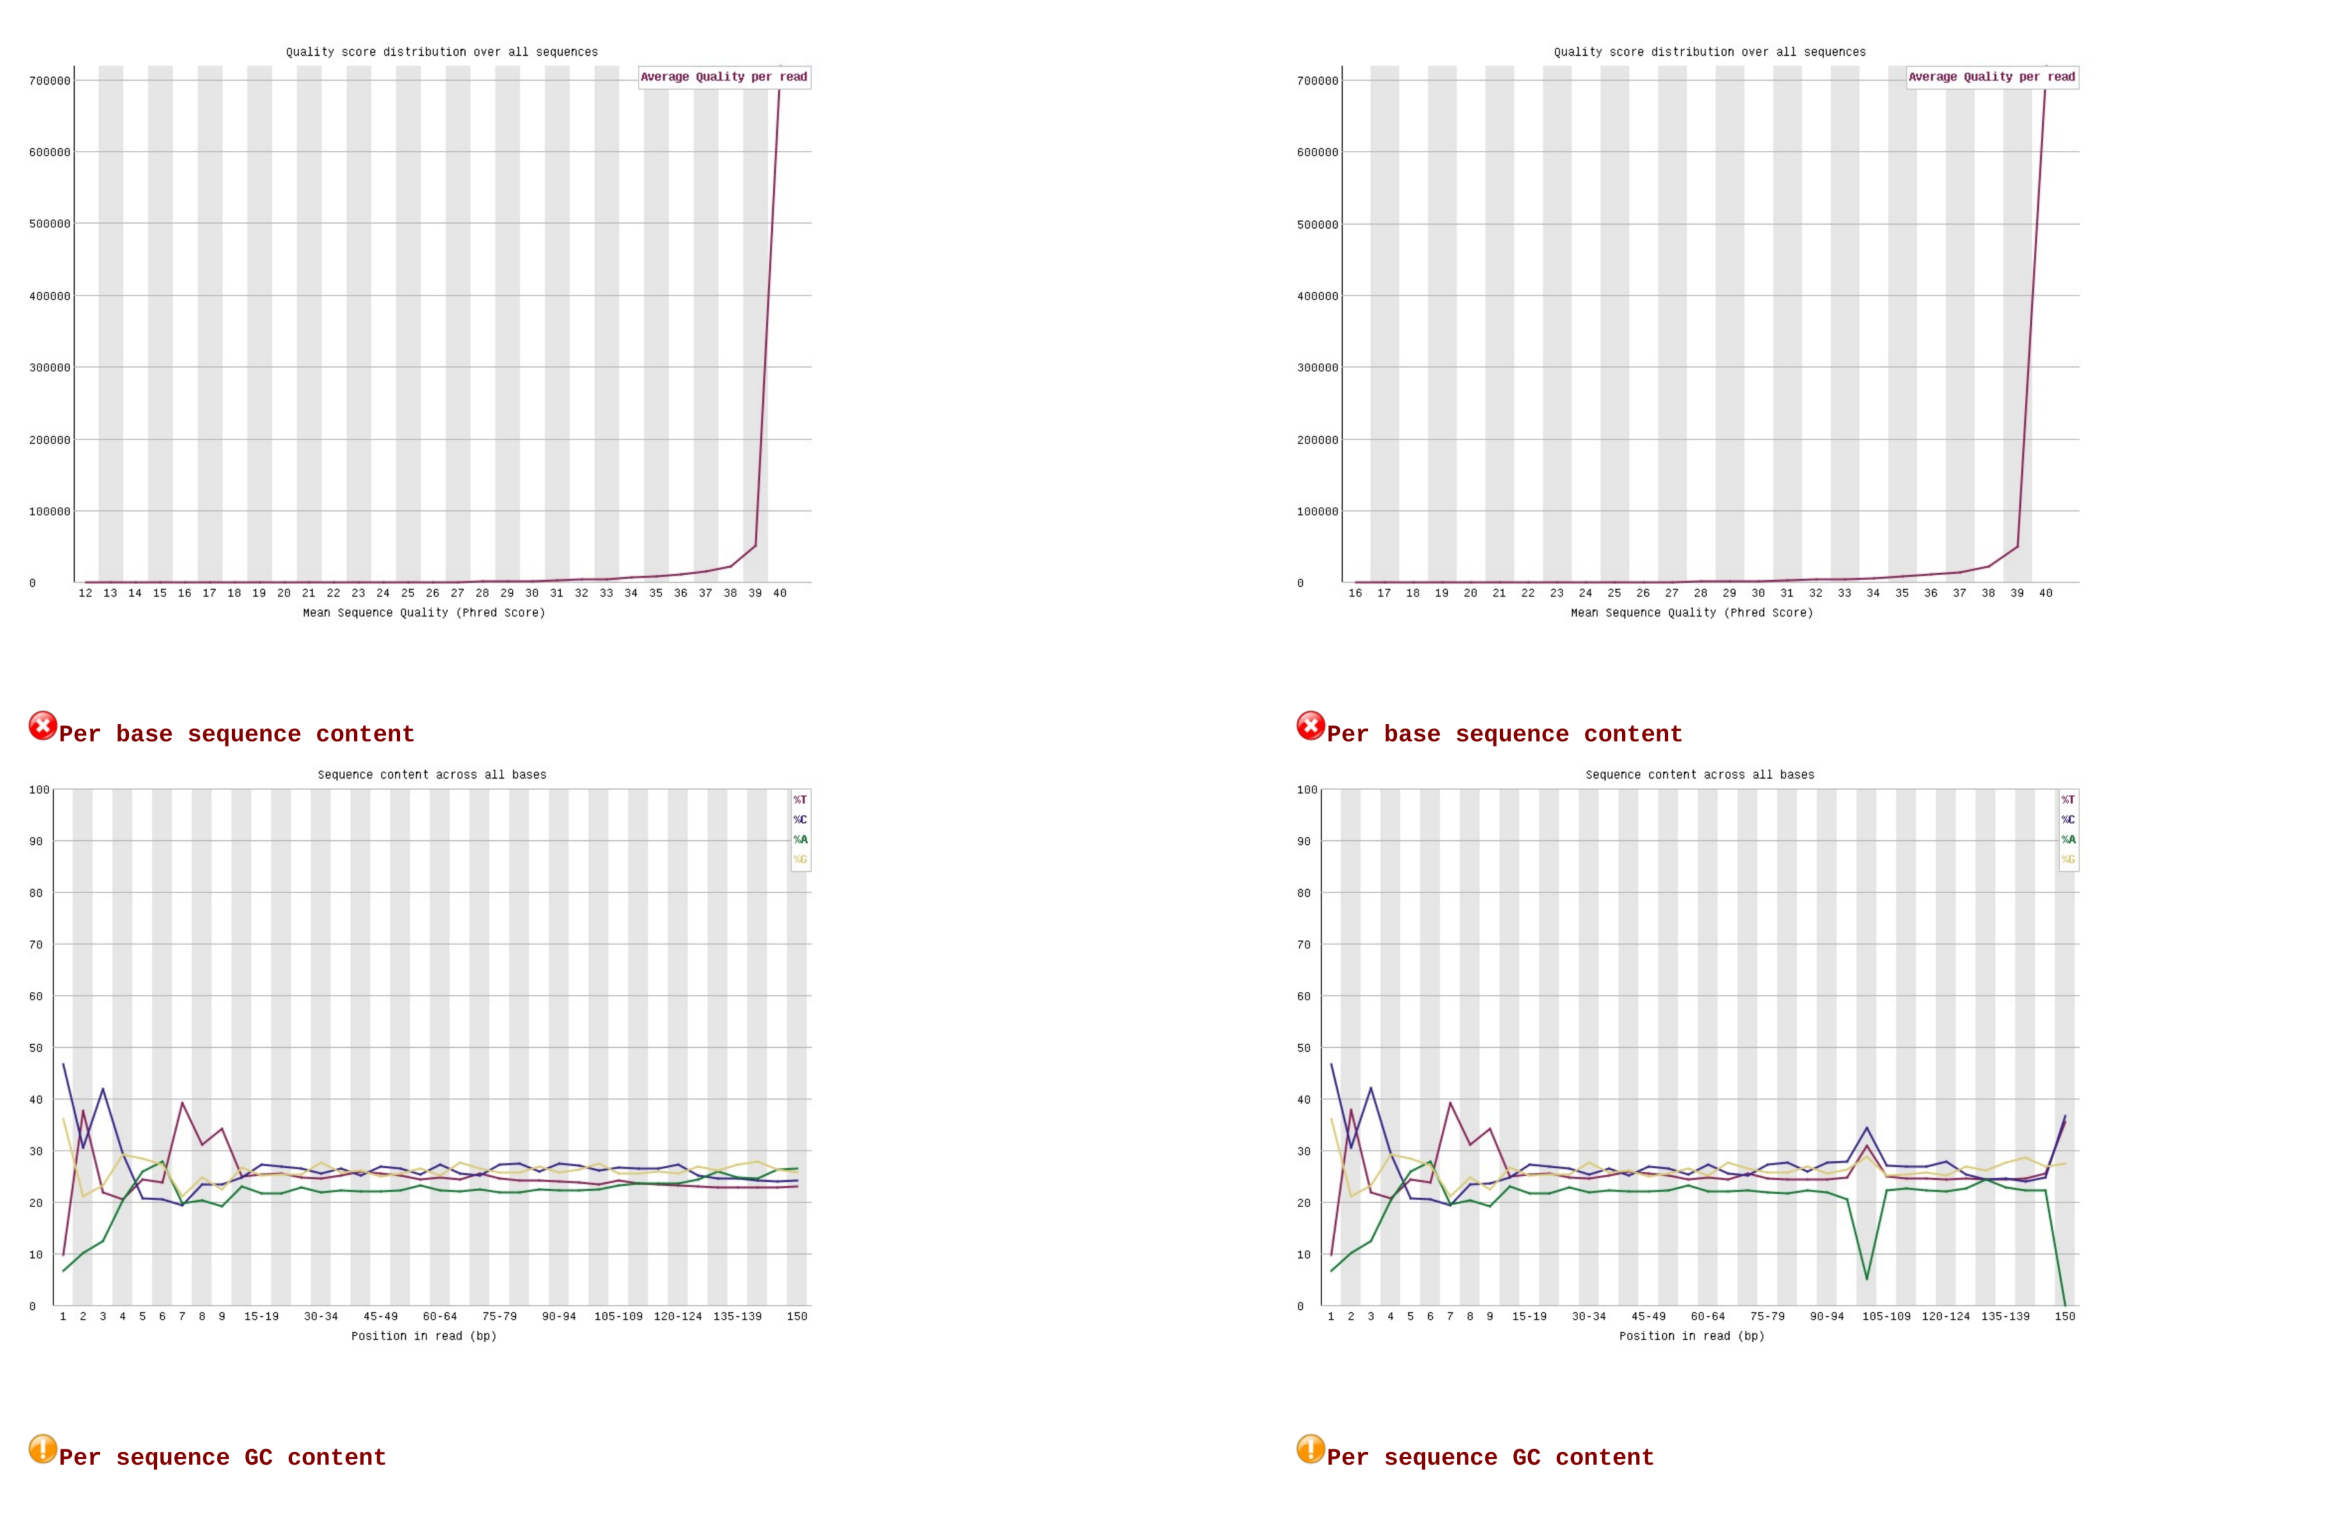

In [40]:
# compare third page of FastQC output for pre- and post-trim R1 data
display_page(images_r1, images_r1_trim, 2)

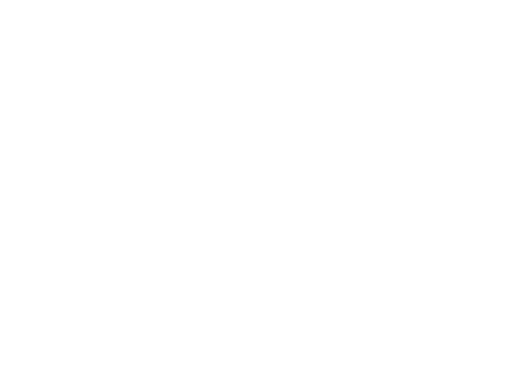

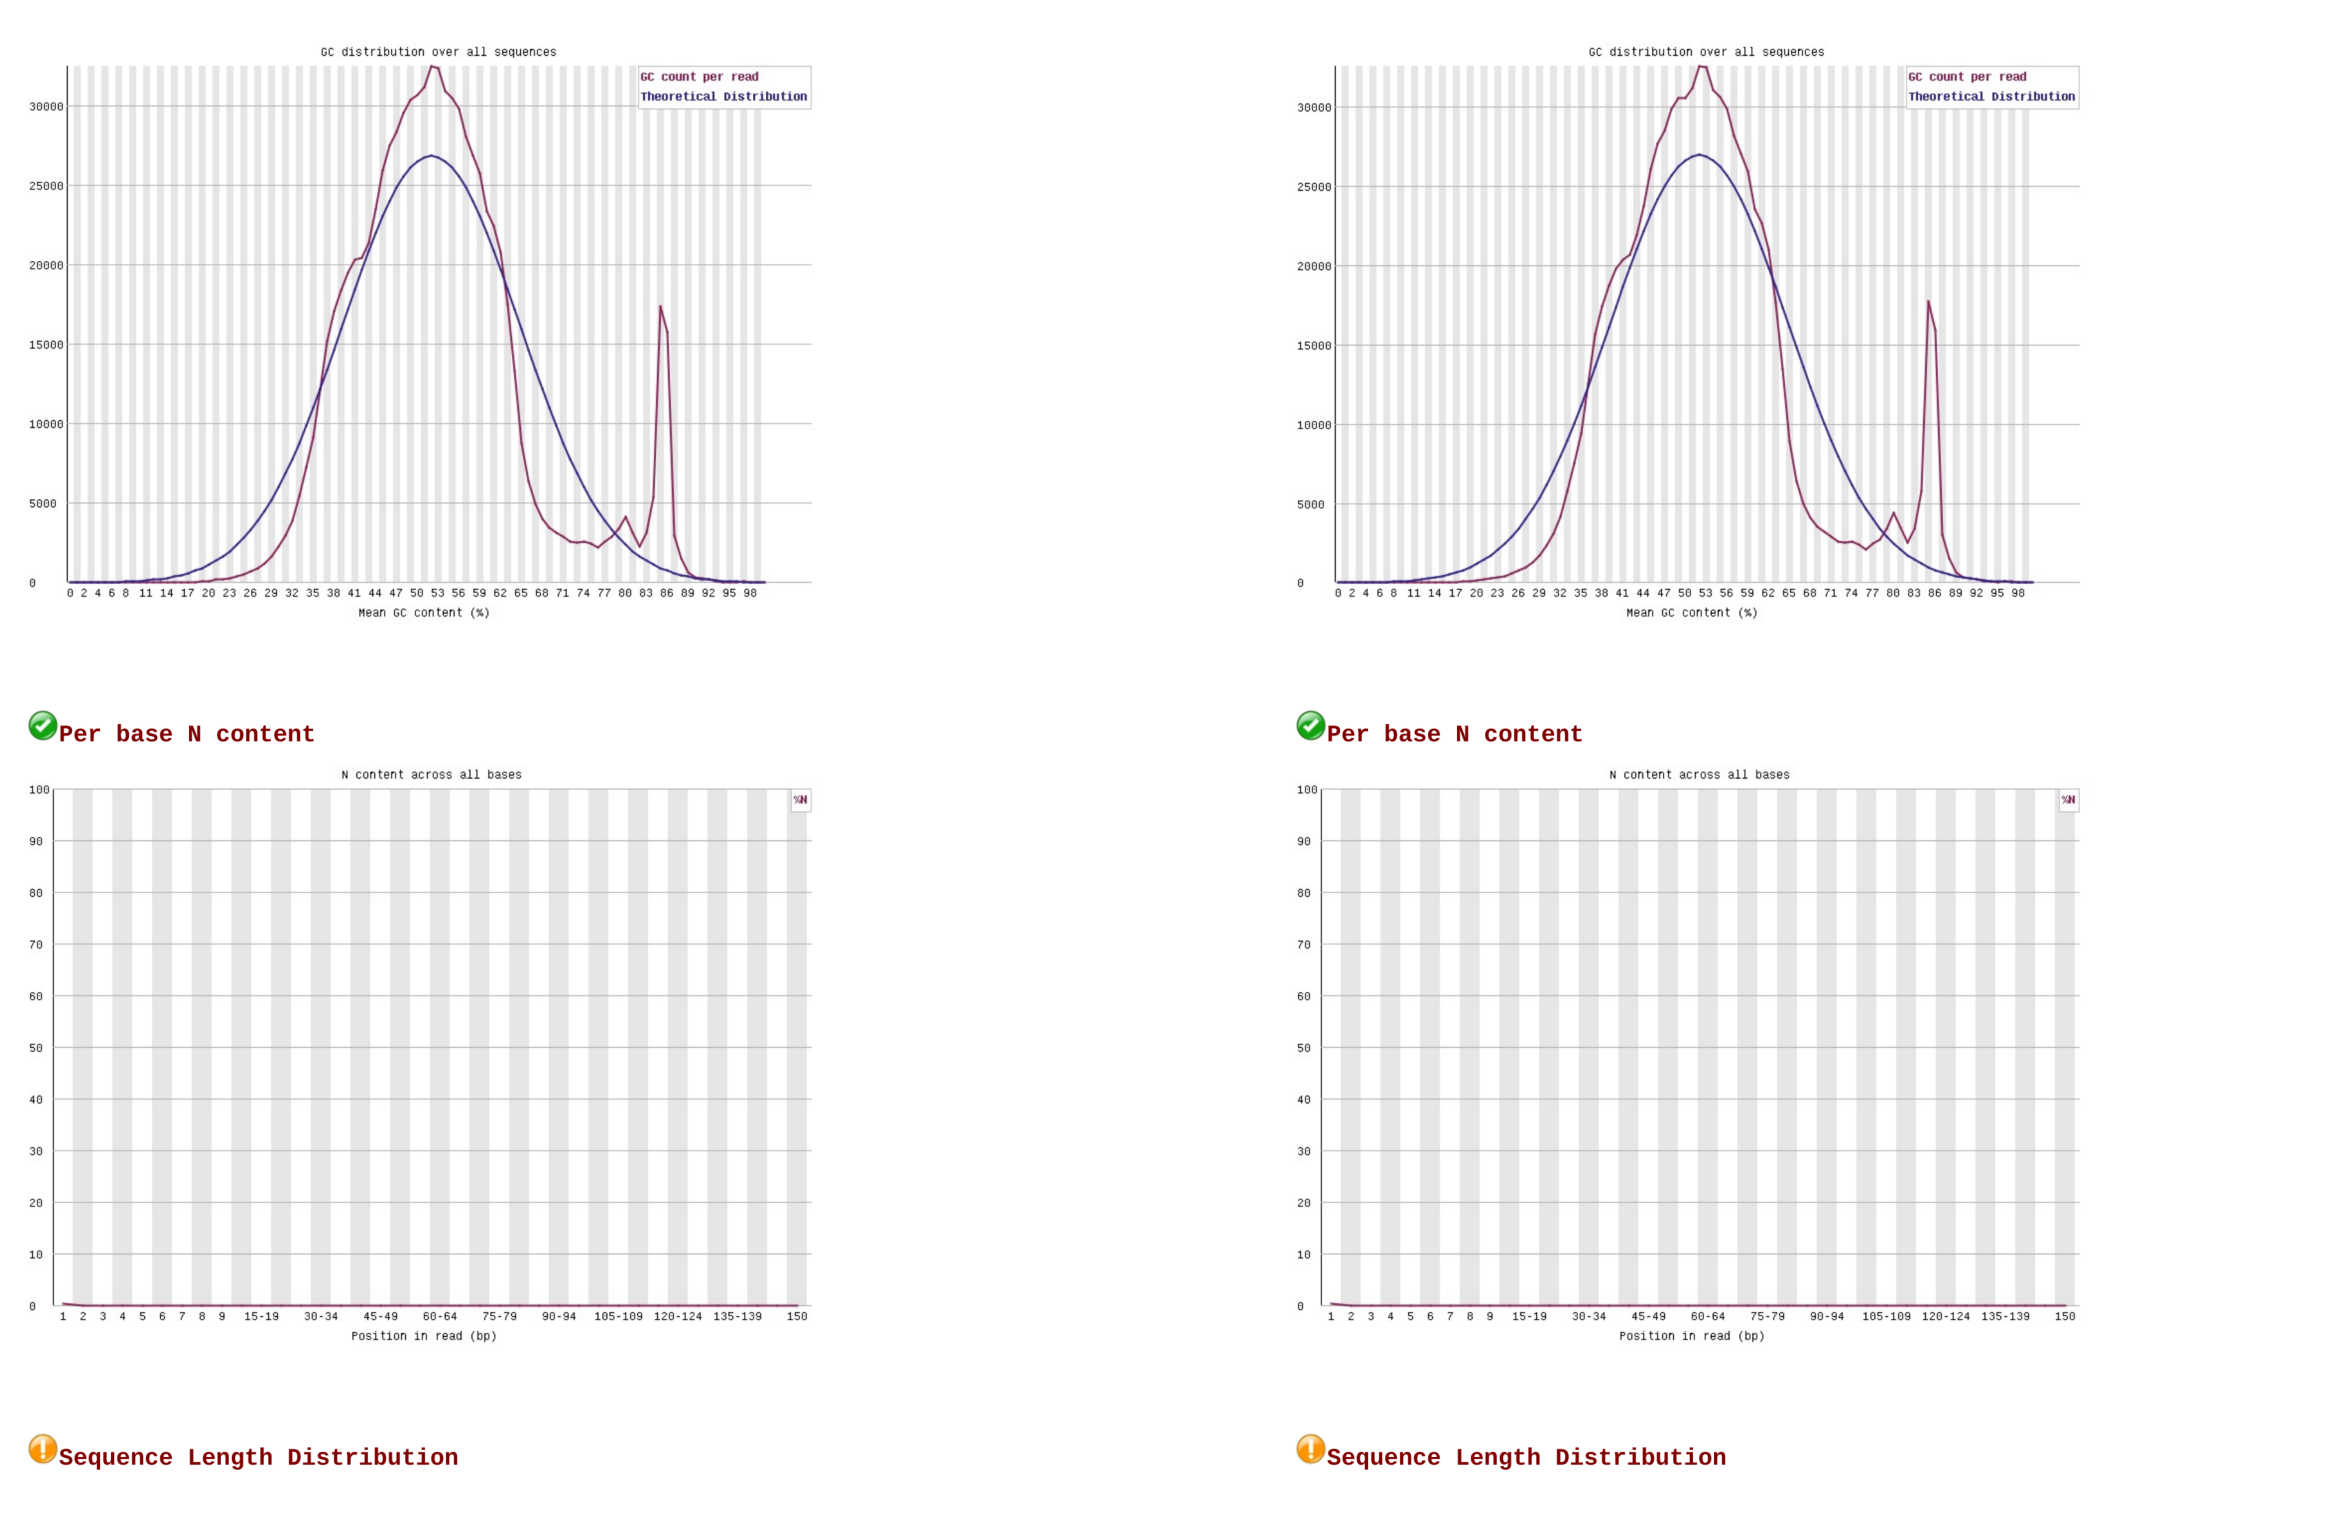

In [41]:
# compare fourth page of FastQC output for pre- and post-trim R1 data
display_page(images_r1, images_r1_trim, 3)

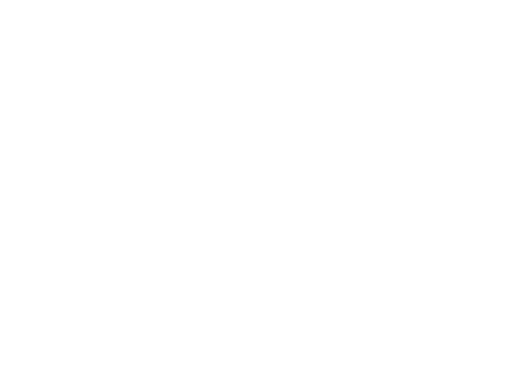

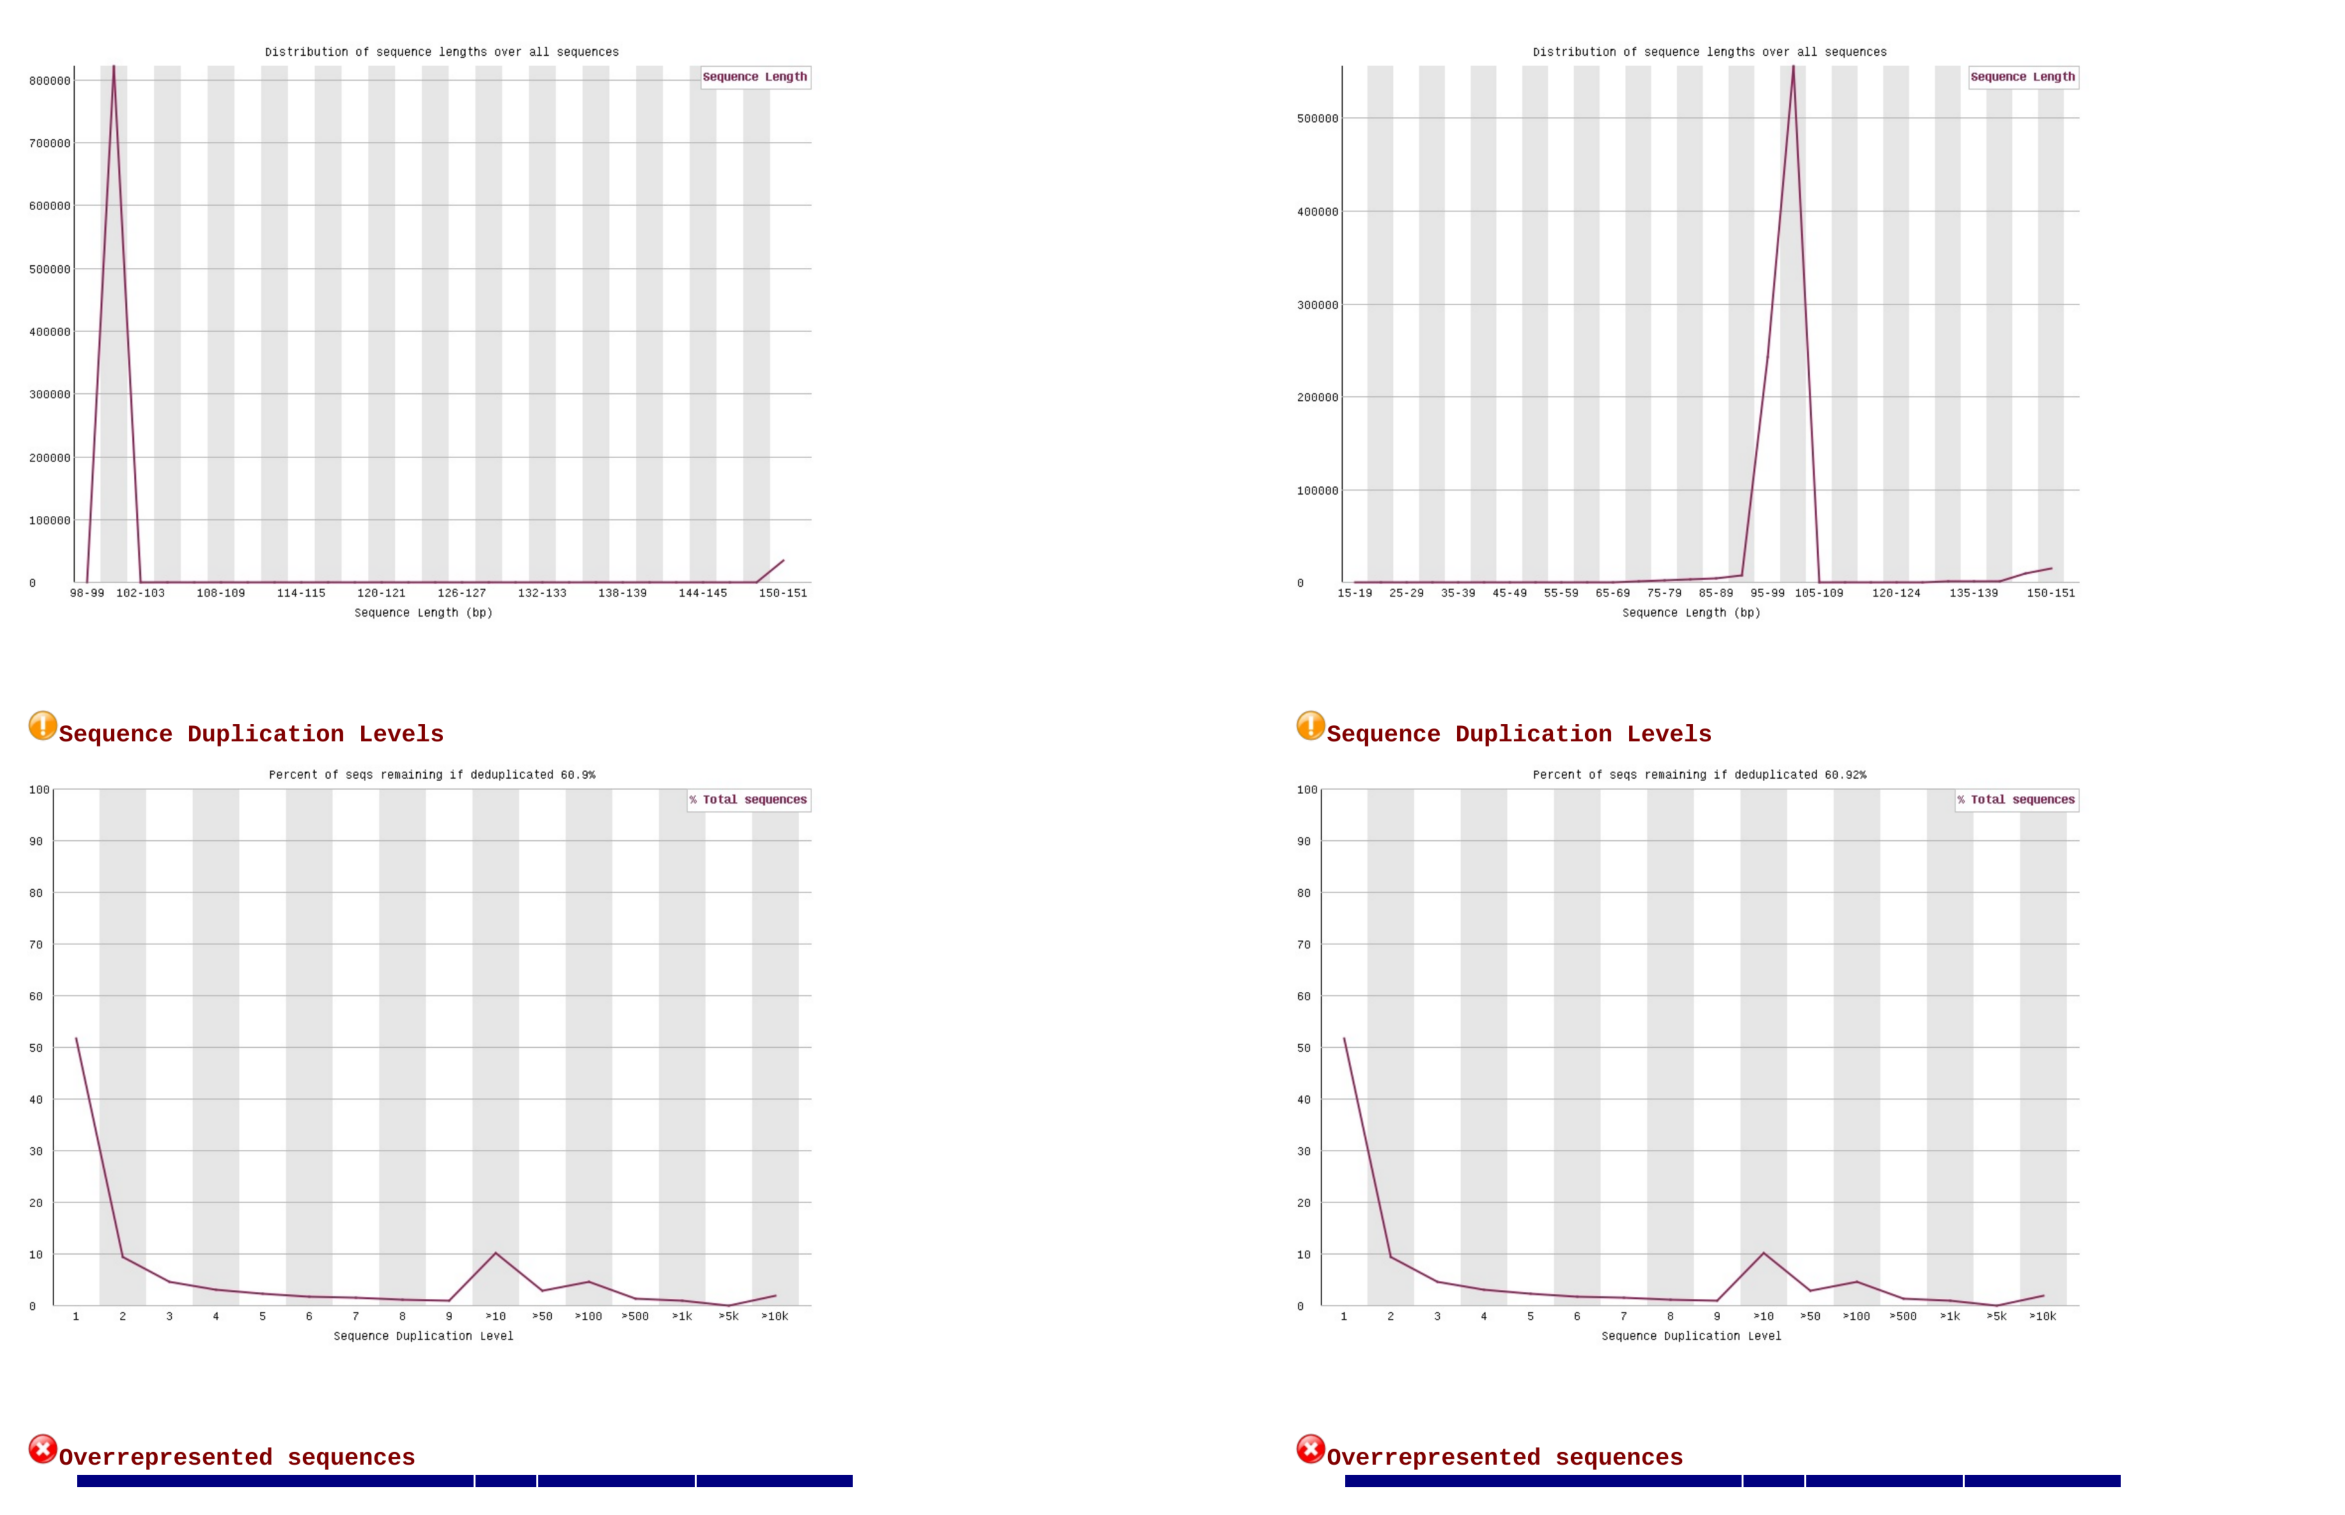

In [42]:
# compare fifth page of FastQC output for pre- and post-trim R1 data
display_page(images_r1, images_r1_trim, 4)

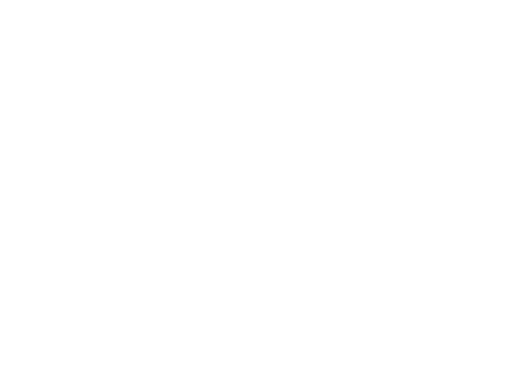

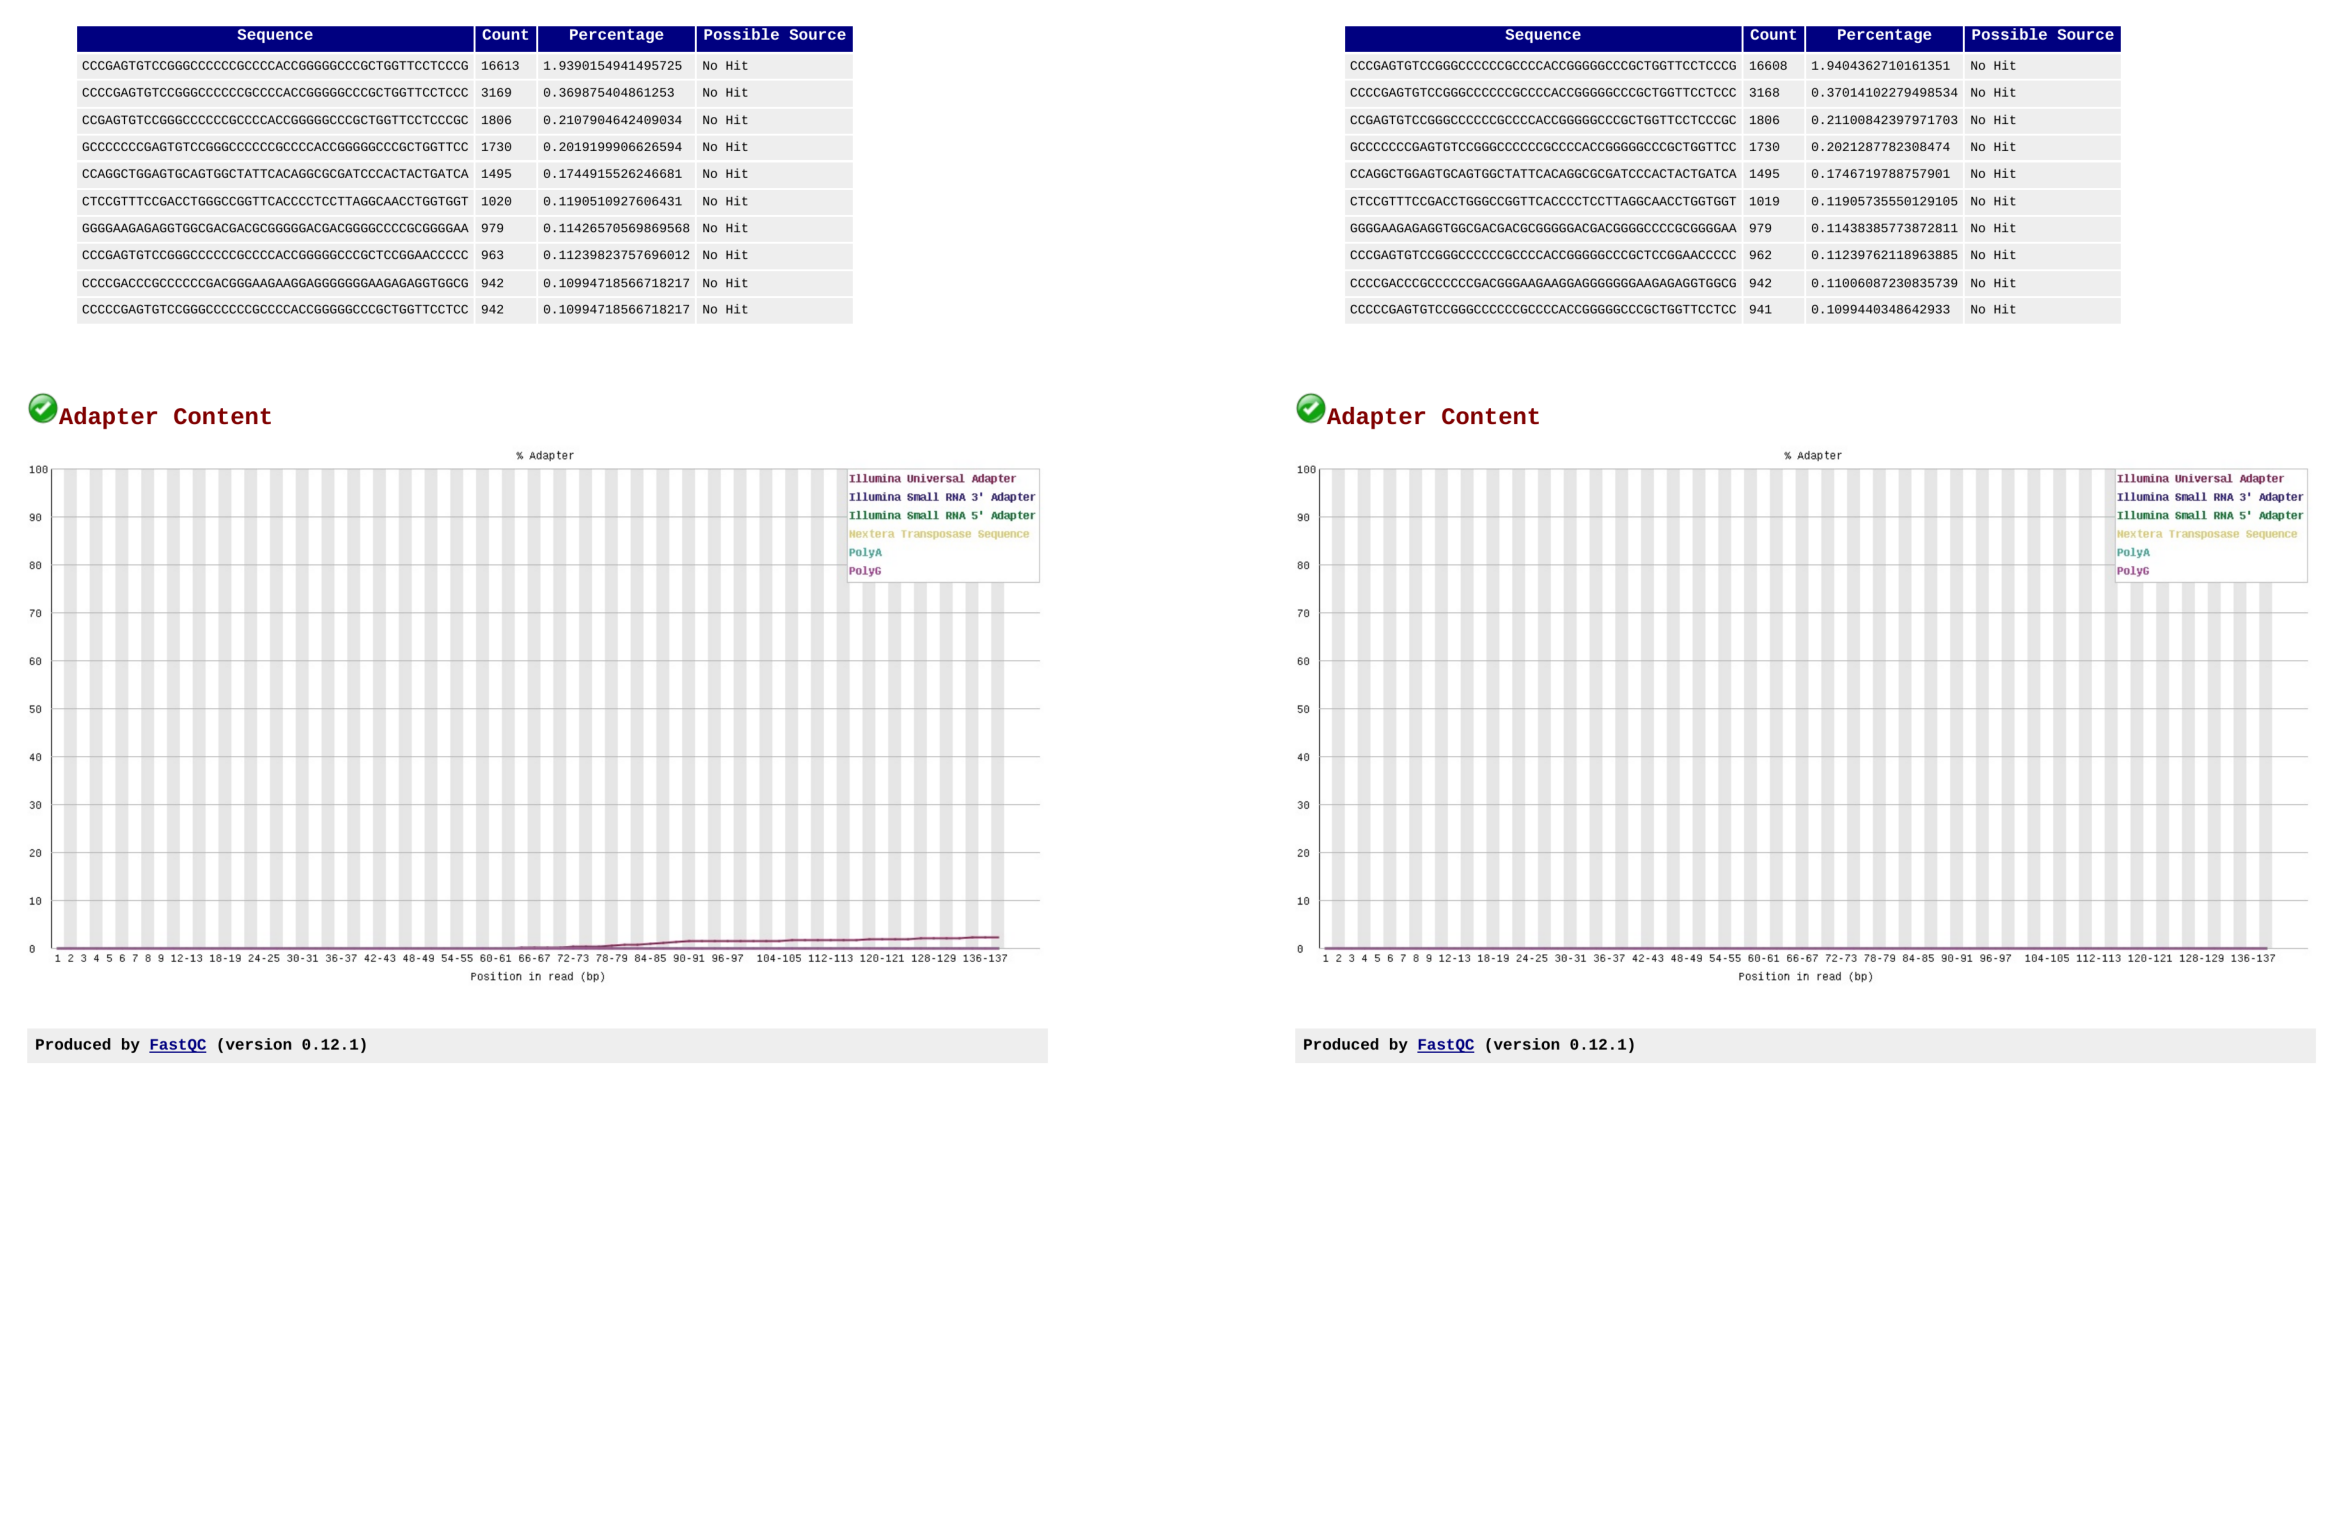

In [43]:
# compare sixth page of FastQC output for pre- and post-trim R1 data
display_page(images_r1, images_r1_trim, 5)

# Check your work before moving on

In [44]:
# check size of all GL4HS drive usage
# should be about 260MB
!du -sh /content/mnt/MyDrive/NASA/GL4HS

216M	/content/mnt/MyDrive/NASA/GL4HS


In [45]:
# time the notebook
import datetime
end_time = datetime.datetime.now()
print('notebook end time: ', end_time.strftime('%Y-%m-%d %H:%M:%S'))

total_notebook_time = end_time - start_time
print('total notebook time: ', total_notebook_time)

notebook end time:  2025-07-14 18:43:03
total notebook time:  0:04:39.231343
